# Import Packages and Settings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

%matplotlib inline

# MetaData

In [2]:
train_data = pd.read_csv('./Data/train.csv')
test_data = pd.read_csv('./Data/test.csv')

In [3]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [5]:
train_data.describe(include=['number'])

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
test_data.describe(include=['number'])

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [7]:
train_data.describe(include=['O'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [8]:
test_data.describe(include=['O'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,4277,4190,4184,4177,4185,4184,4183
unique,4277,3,2,3265,3,2,4176
top,0013_01,Earth,False,G/160/P,TRAPPIST-1e,False,Cints Erle
freq,1,2263,2640,8,2956,4110,2


In [9]:
columns_missing = train_data.columns[train_data.isnull().any()].tolist()
total = train_data[columns_missing].isnull().sum()
percent = (total / train_data.shape[0])
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).sort_values('Total', ascending=False)
missing_data

,Total,Percent
CryoSleep,217,0.024963
ShoppingMall,208,0.023927
VIP,203,0.023352
HomePlanet,201,0.023122
Name,200,0.023007
Cabin,199,0.022892
VRDeck,188,0.021627
FoodCourt,183,0.021051
Spa,183,0.021051
Destination,182,0.020936


In [10]:
columns_missing = test_data.columns[test_data.isnull().any()].tolist()
total = test_data[columns_missing].isnull().sum()
percent = (total / test_data.shape[0])
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).sort_values('Total', ascending=False)
missing_data

,Total,Percent
FoodCourt,106,0.024784
Spa,101,0.023615
Cabin,100,0.023381
ShoppingMall,98,0.022913
Name,94,0.021978
CryoSleep,93,0.021744
VIP,93,0.021744
Destination,92,0.021510
Age,91,0.021277
HomePlanet,87,0.020341


In [4]:
feature = 'Transported'
train_data[feature] = train_data[feature].astype(int)

feature = 'CryoSleep'
train_data[feature] = train_data[feature].replace({'False': 0, 'True': 1}).astype('Int64')
test_data[feature] = test_data[feature].replace({'False': 0, 'True': 1}).astype('Int64')

feature = 'VIP'
train_data[feature] = train_data[feature].replace({'False': 0, 'True': 1}).astype('Int64')
test_data[feature] = test_data[feature].replace({'False': 0, 'True': 1}).astype('Int64')

# Univariate Analysis

## Numeric Features

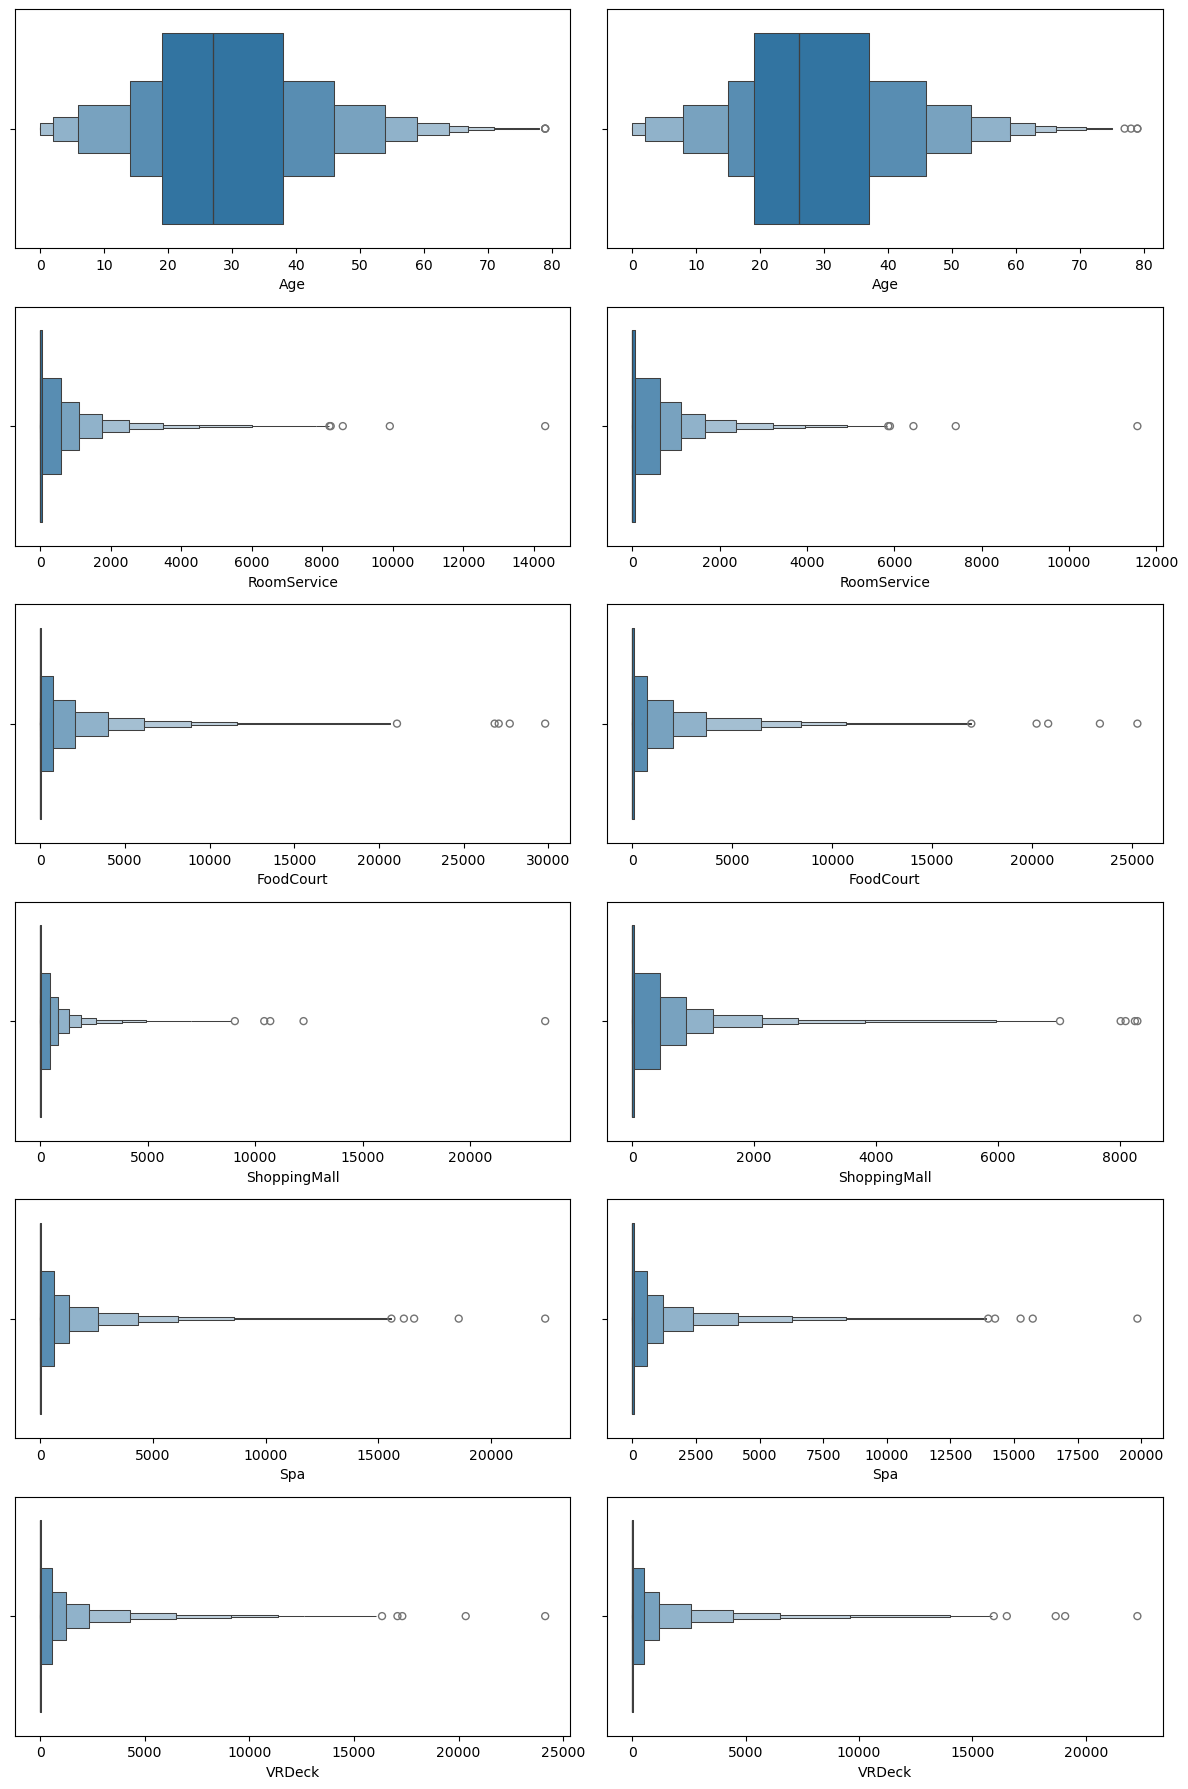

In [46]:
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(12, 18))

for i, f in enumerate(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']):
    sns.boxenplot(data=train_data, x=f, ax=ax[i, 0])
    sns.boxenplot(data=test_data, x=f, ax=ax[i, 1])

fig.tight_layout()

## Categorical Features

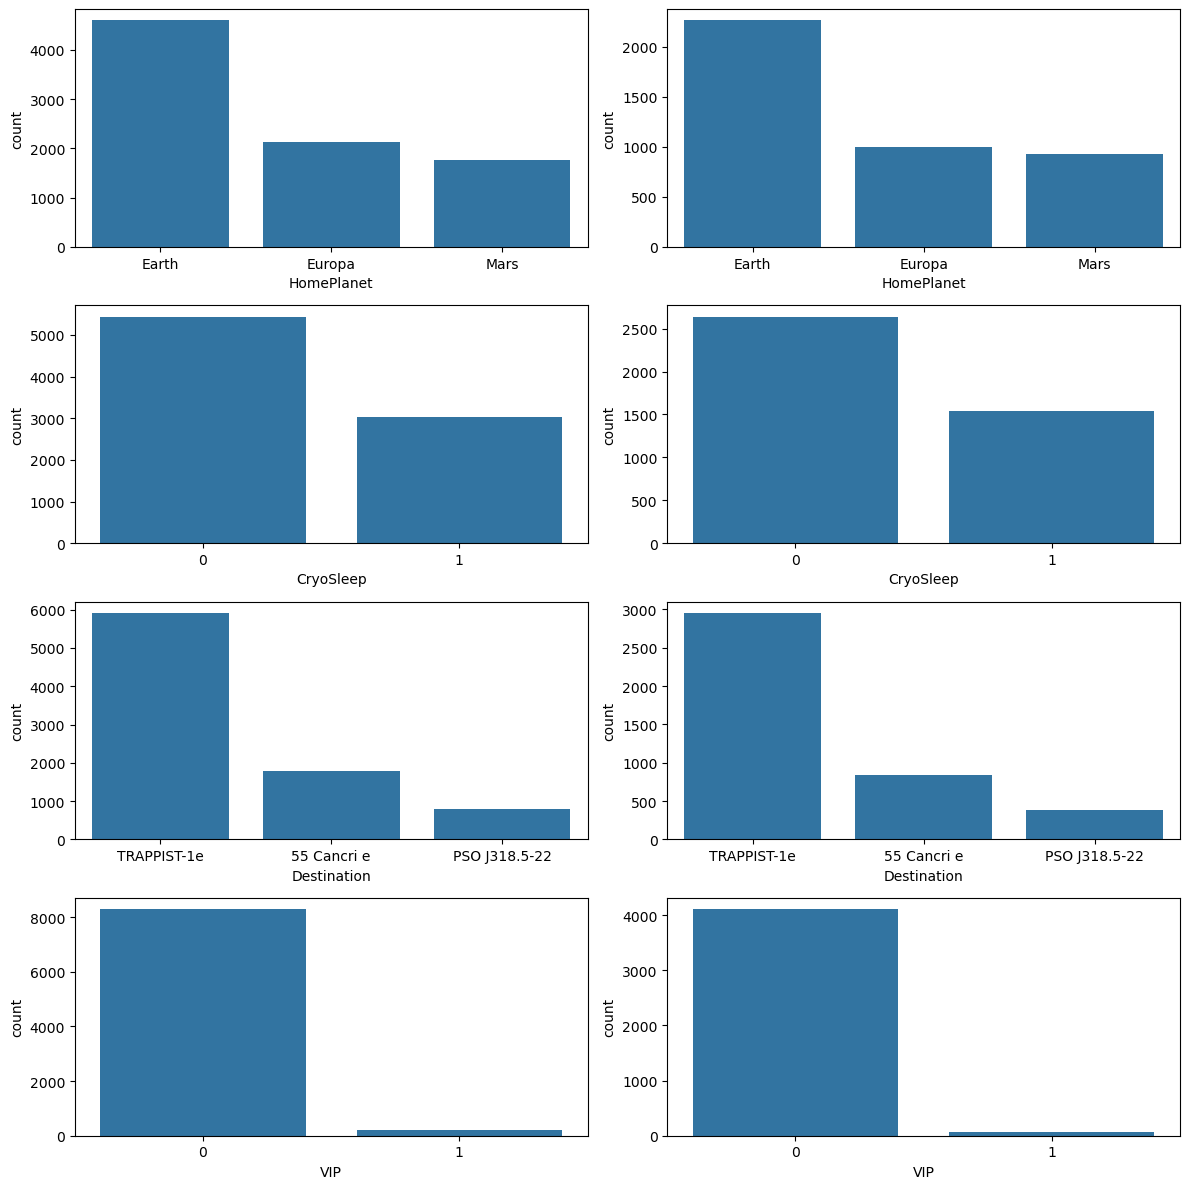

In [45]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(12, 12))

for i, f in enumerate(['HomePlanet', 'CryoSleep', 'Destination', 'VIP']):
    order = train_data[f].value_counts().index
    sns.countplot(data=train_data, x=f, order=order, ax=ax[i, 0])
    sns.countplot(data=test_data, x=f, order=order, ax=ax[i, 1])

fig.tight_layout()

## Label

<Axes: xlabel='Transported', ylabel='count'>

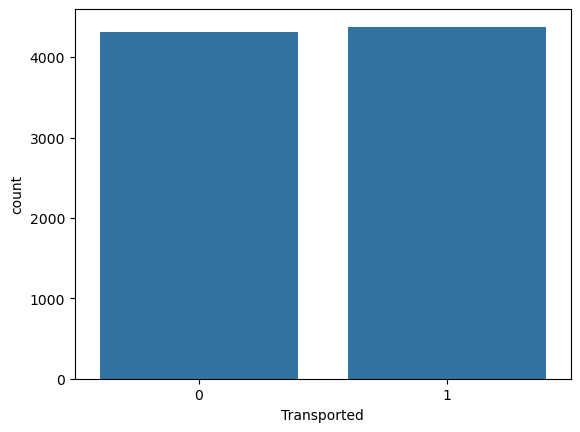

In [13]:
sns.countplot(data=train_data, x='Transported')

# Multivariate Analysis

## Heatmap

<Axes: >

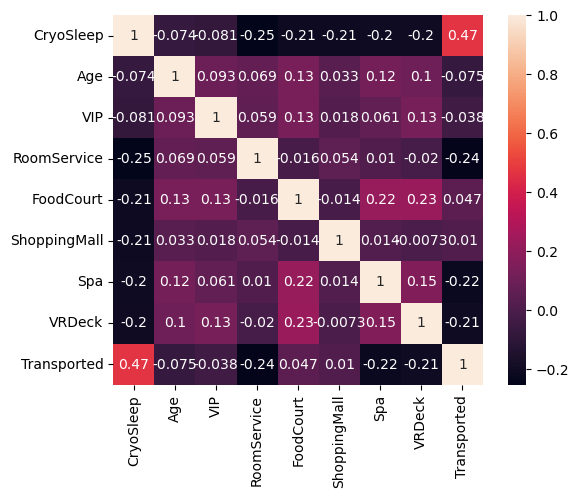

In [14]:
corr = train_data.select_dtypes(exclude='O').corr()
sns.heatmap(corr, square=True, annot=True)

## Transported

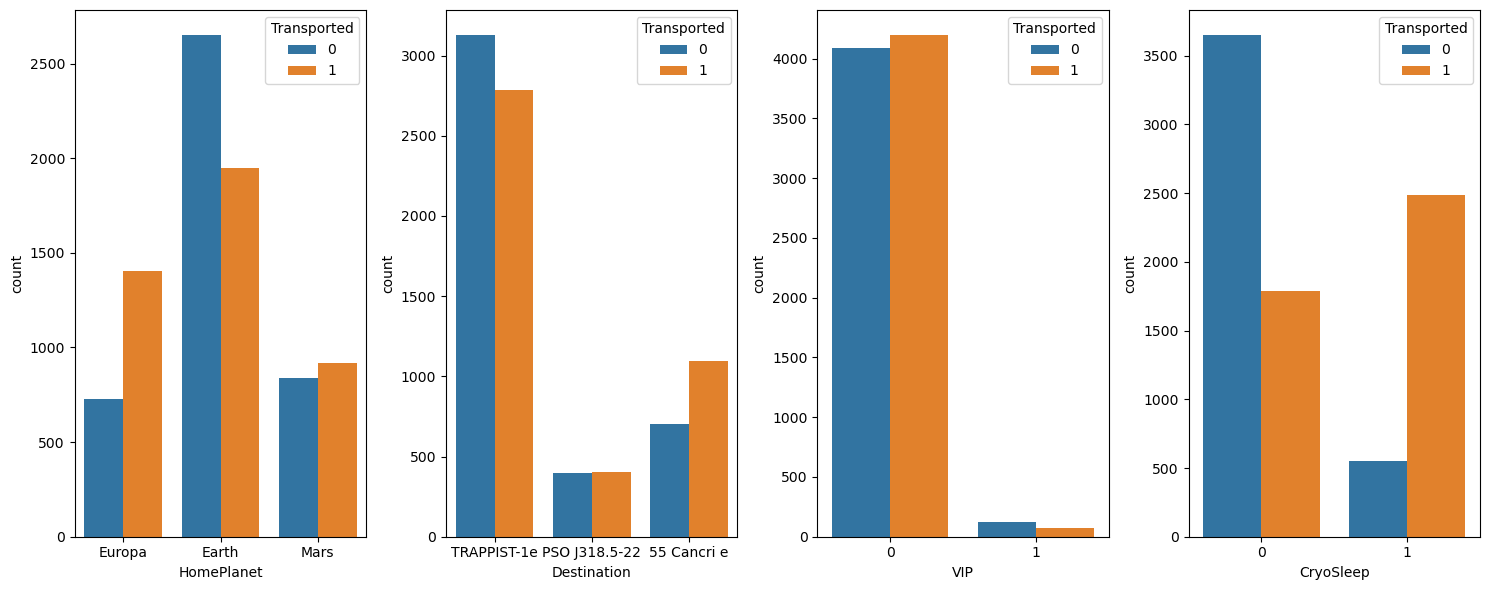

In [46]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 6))

for i, f in enumerate(['HomePlanet', 'Destination', 'VIP', 'CryoSleep']):
    sns.countplot(data=train_data, x=f, hue='Transported', ax=ax[i])

fig.tight_layout()

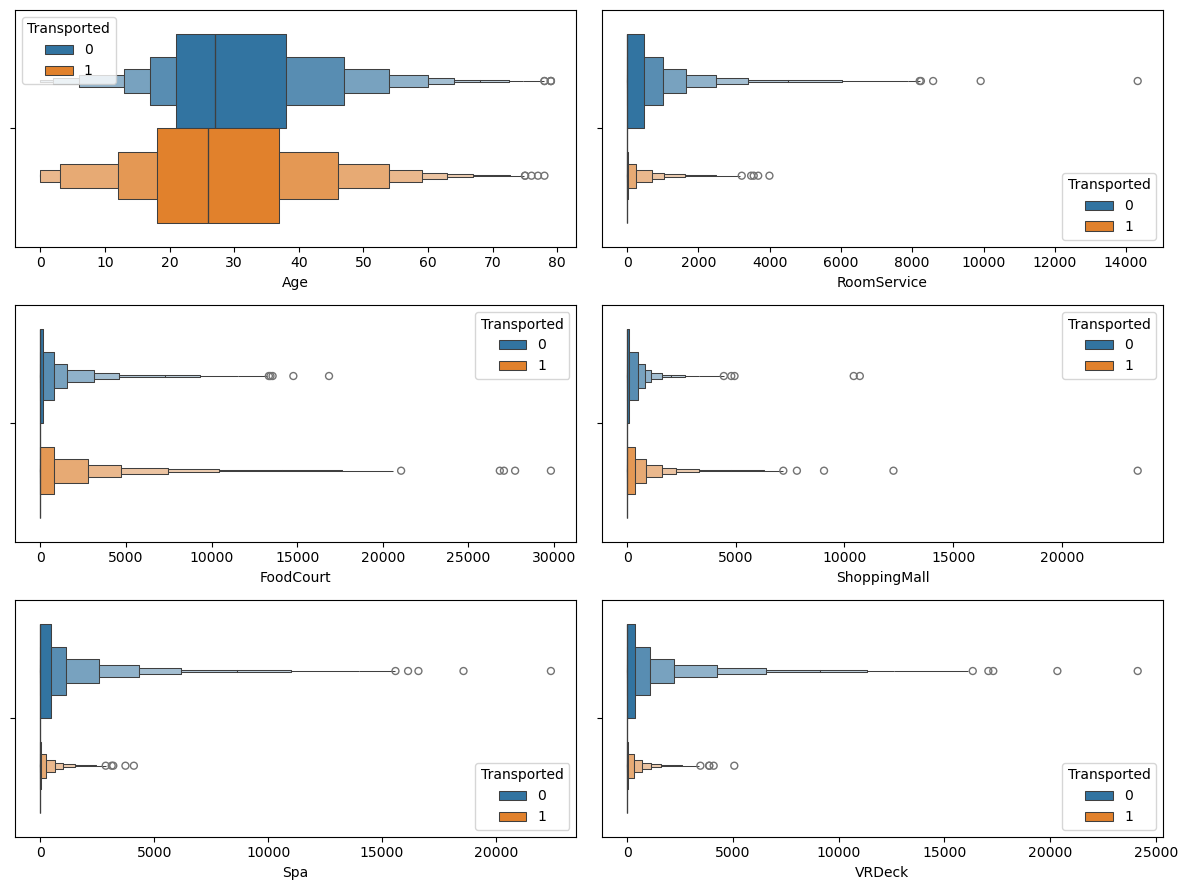

In [47]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 9))

for i, f in enumerate(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']):
    sns.boxenplot(data=train_data, x=f, hue='Transported', ax=ax[i//2, i%2])

fig.tight_layout()

## Outliers (possible)

In [13]:
train_data.loc[train_data['RoomService'] > 14000]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
4416,4690_02,Europa,0,NaN,TRAPPIST-1e,27.0,0,14327.0,1487.0,0.0,1.0,0.0,Tope Dishocatal,0


In [14]:
train_data.loc[train_data['ShoppingMall'] > 20000]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8415,8989_01,Europa,0,B/291/P,TRAPPIST-1e,17.0,0,0.0,366.0,23492.0,356.0,3.0,NaN,1


In [7]:
train_data.loc[train_data['Spa'] > 20000]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
5722,6064_01,Europa,0,C/186/P,55 Cancri e,68.0,0,125.0,13437.0,0.0,22408.0,17.0,Markar Radisiouss,0


In [15]:
train_data.loc[train_data['VRDeck'] > 20000]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
4311,4594_02,Europa,0,C/144/P,TRAPPIST-1e,31.0,0,0.0,6670.0,217.0,625.0,20336.0,Tabiton Folhal,0
5619,5977_02,Europa,0,B/230/S,55 Cancri e,57.0,0,200.0,9.0,0.0,NaN,24133.0,NaN,0


## CryoSleep

In [22]:
train_data[['Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].corrwith(train_data['CryoSleep'])

Age            -0.074273
VIP            -0.081402
RoomService    -0.252396
FoodCourt      -0.211510
ShoppingMall   -0.212514
Spa            -0.203991
VRDeck         -0.198857
dtype: float64

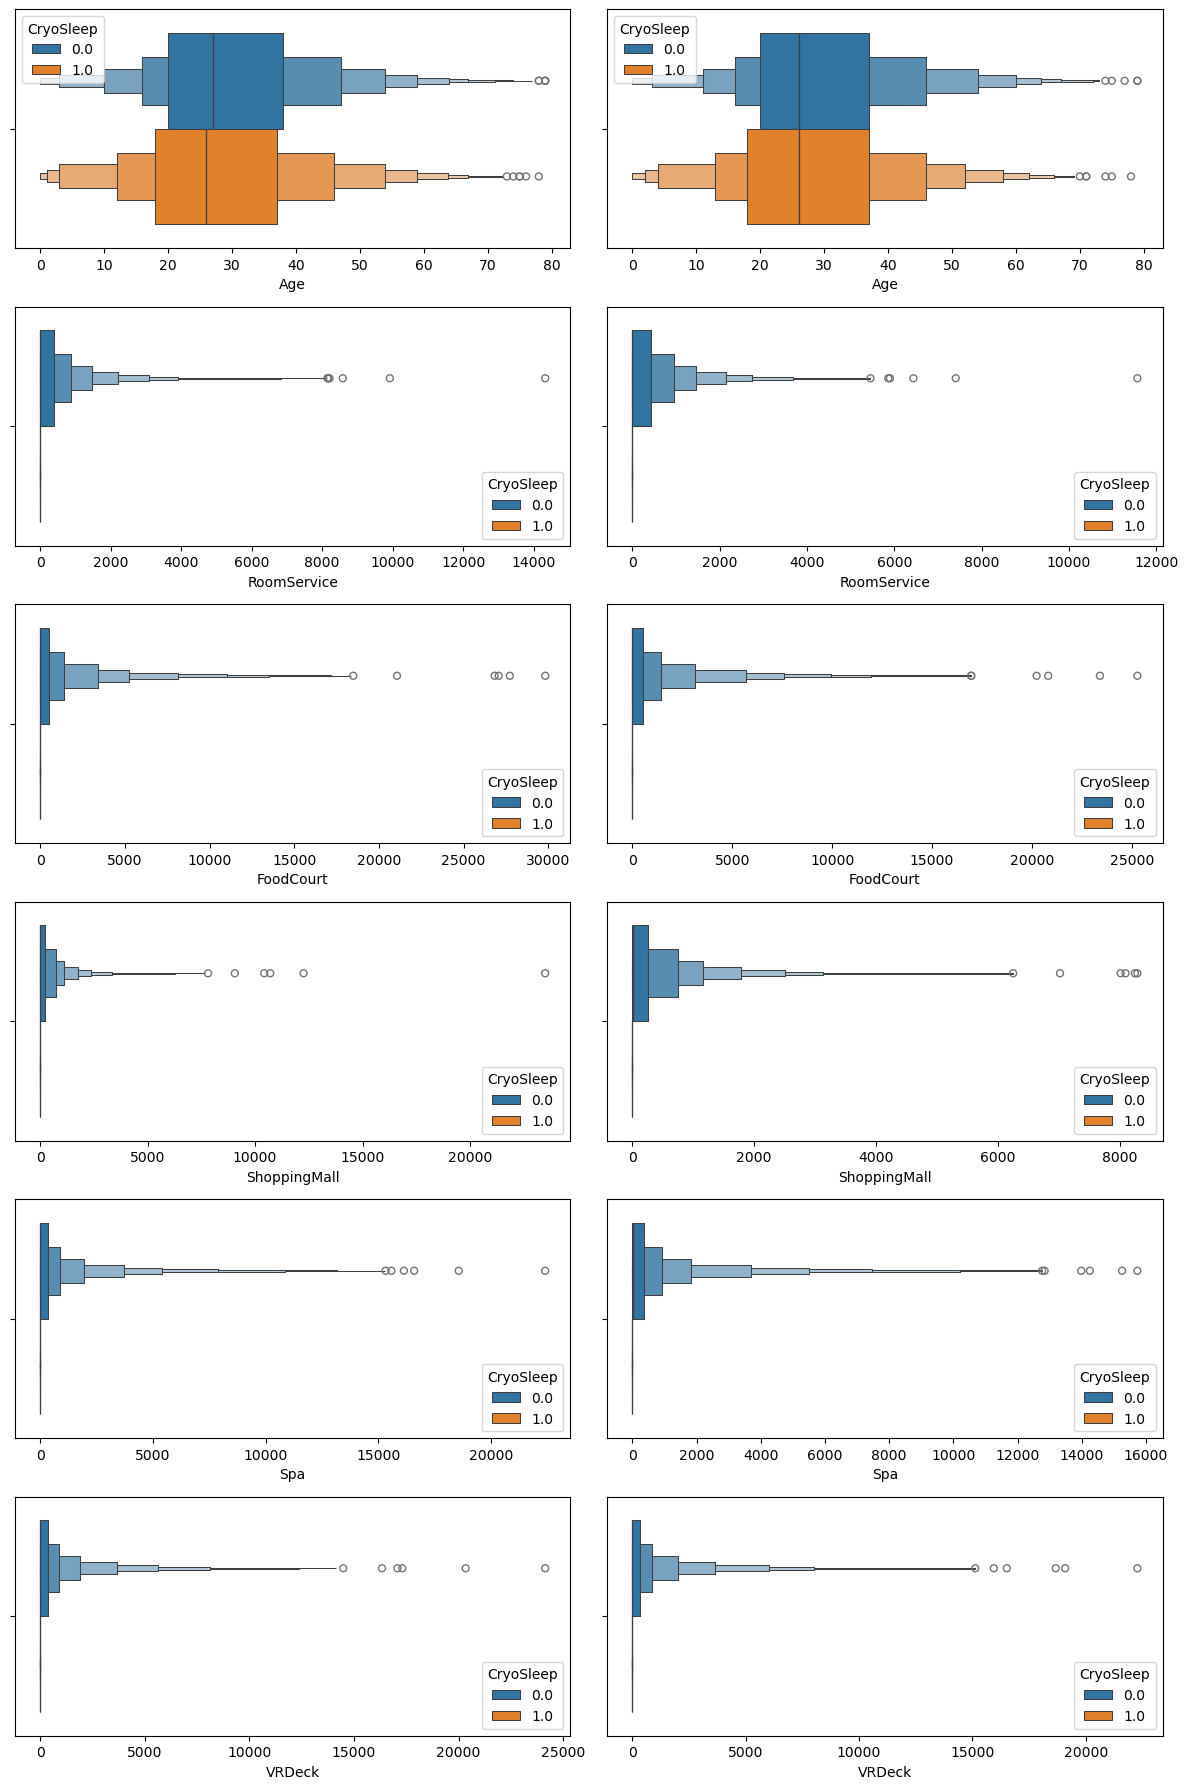

In [23]:
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(12, 18))

for i, f in enumerate(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']):
    sns.boxenplot(data=train_data, x=f, hue='CryoSleep', ax=ax[i, 0])
    sns.boxenplot(data=test_data, x=f, hue='CryoSleep', ax=ax[i, 1])

fig.tight_layout()

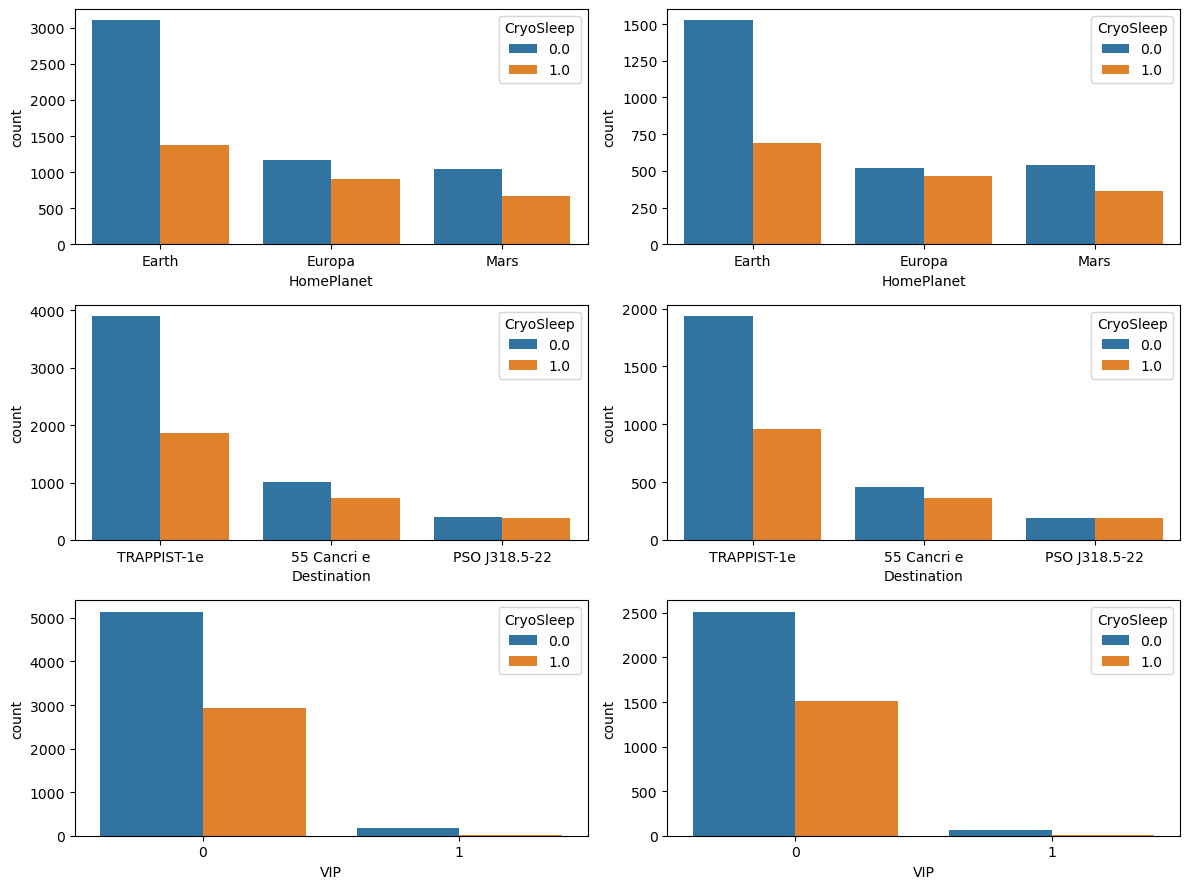

In [48]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 9))

for i, f in enumerate(['HomePlanet', 'Destination', 'VIP']):
    order = train_data[f].value_counts().index
    sns.countplot(data=train_data, x=f, hue='CryoSleep', order=order, ax=ax[i, 0])
    sns.countplot(data=test_data, x=f, hue='CryoSleep', order=order, ax=ax[i, 1])

fig.tight_layout()

## VIP

In [52]:
train_data[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].corrwith(train_data['VIP'])

Age             0.092819
RoomService     0.058785
FoodCourt       0.129799
ShoppingMall    0.018295
Spa             0.061059
VRDeck          0.125974
dtype: float64

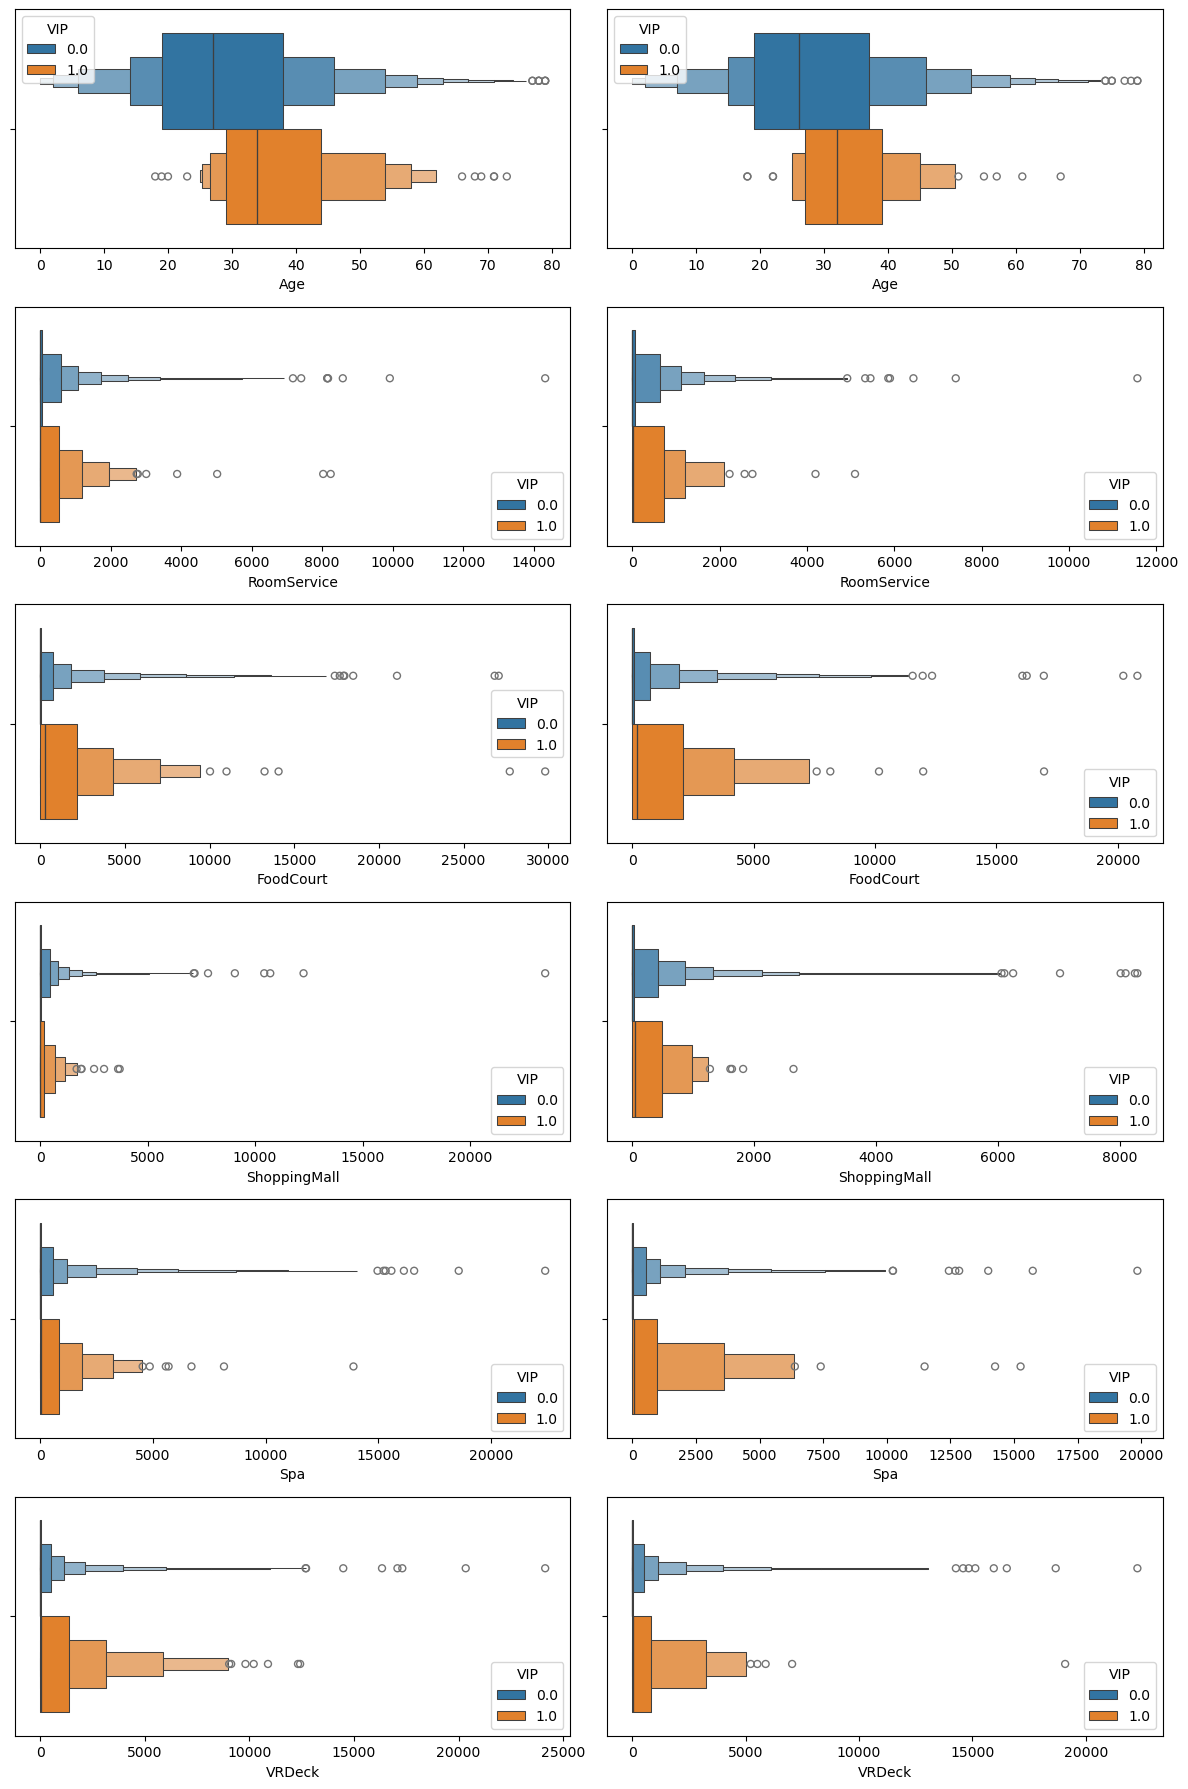

In [18]:
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(12, 18))

for i, f in enumerate(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']):
    sns.boxenplot(data=train_data, x=f, hue='VIP', ax=ax[i, 0])
    sns.boxenplot(data=test_data, x=f, hue='VIP', ax=ax[i, 1])

fig.tight_layout()

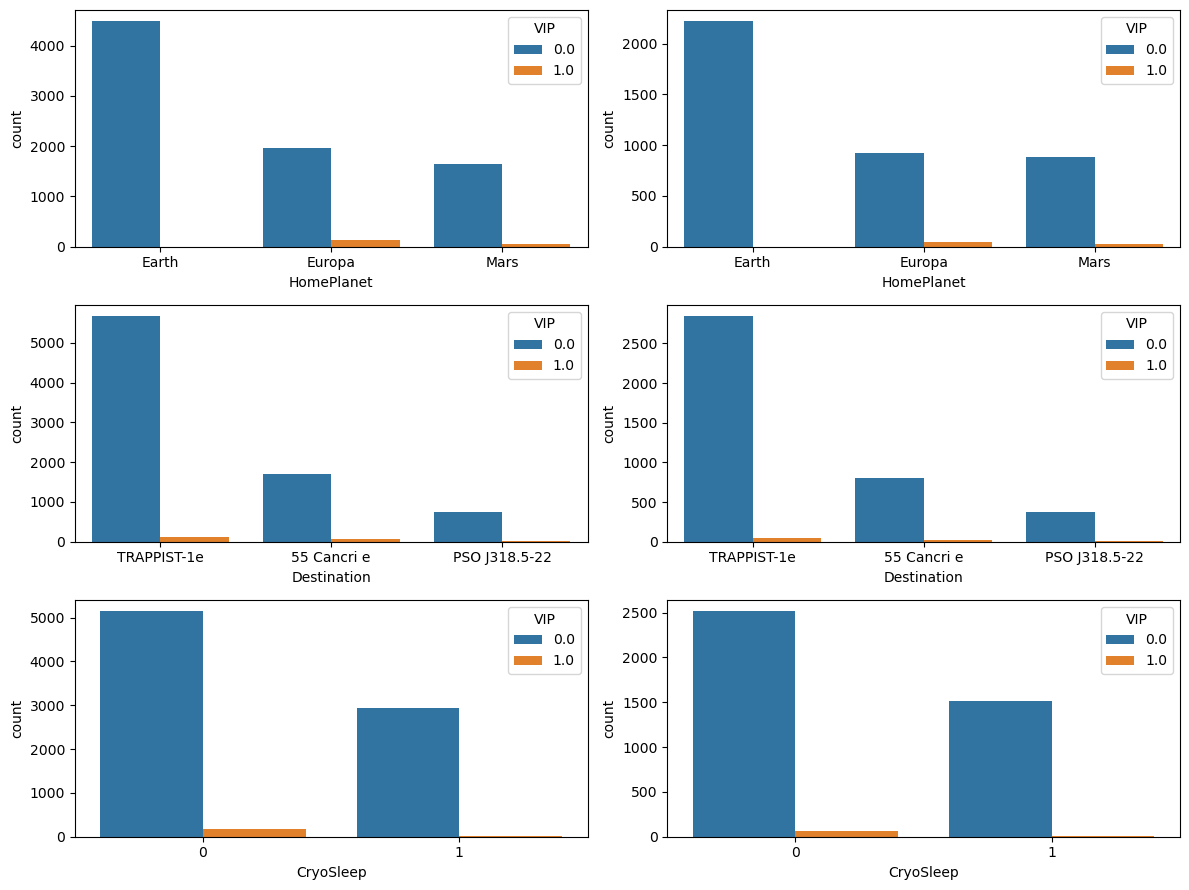

In [49]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 9))

for i, f in enumerate(['HomePlanet', 'Destination', 'CryoSleep']):
    order = train_data[f].value_counts().index
    sns.countplot(data=train_data, x=f, hue='VIP', order=order, ax=ax[i, 0])
    sns.countplot(data=test_data, x=f, hue='VIP', order=order, ax=ax[i, 1])

fig.tight_layout()

## Passenger Group

In [3]:
train_data['PassengerGroup'] = train_data['PassengerId'].apply(lambda x: x.split('_')[0])
test_data['PassengerGroup'] = test_data['PassengerId'].apply(lambda x: x.split('_')[0])

In [5]:
train_data['PassengerGroup'].describe()

count     8693
unique    6217
top       4498
freq         8
Name: PassengerGroup, dtype: object

In [15]:
test_data['PassengerGroup'].describe()

count     4277
unique    3063
top       6332
freq         8
Name: PassengerGroup, dtype: object

In [28]:
train_data['PassengerGroup'].map(test_data['PassengerGroup'].value_counts()).value_counts()

Series([], Name: count, dtype: int64)

In [14]:
train_data['PassengerGroup'].corr(train_data['Transported'])

0.021490968795151815

In [12]:
train_data[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CryoSleep', 'VIP']].corrwith(train_data['PassengerGroup'])

Age            -0.009439
RoomService    -0.000346
FoodCourt      -0.009552
ShoppingMall    0.017397
Spa            -0.005211
VRDeck          0.015432
CryoSleep      -0.005879
VIP             0.014018
dtype: float64

In [29]:
test_data[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CryoSleep', 'VIP']].corrwith(test_data['PassengerGroup'])

Age            -0.022097
RoomService    -0.002072
FoodCourt      -0.013573
ShoppingMall   -0.058130
Spa            -0.008567
VRDeck         -0.011377
CryoSleep       0.000400
VIP             0.008832
dtype: float64

In [5]:
train_data[['Transported', 'PassengerGroup']].groupby(by='PassengerGroup').mean().value_counts()

Transported
0.000000       2868
1.000000       2552
0.500000        410
0.666667        139
0.333333         98
0.750000         35
0.600000         16
0.250000         16
0.800000         13
0.400000         10
0.833333          9
0.571429          9
0.428571          8
0.200000          7
0.714286          5
0.375000          5
0.166667          4
0.285714          4
0.857143          4
0.125000          2
0.625000          2
0.142857          1
Name: count, dtype: int64

In [6]:
train_data[['CryoSleep', 'PassengerGroup']].groupby(by='PassengerGroup').mean().value_counts()

CryoSleep
0.000000     3626
1.000000     1672
0.500000      412
0.333333      139
0.666667      113
0.250000       40
0.750000       18
0.400000       17
0.200000       12
0.600000       11
0.428571        9
0.571429        7
0.166667        6
0.285714        6
0.375000        5
0.800000        5
0.833333        3
0.142857        3
0.714286        2
0.857143        2
0.125000        1
Name: count, dtype: int64

In [10]:
test_data[['CryoSleep', 'PassengerGroup']].groupby(by='PassengerGroup').mean().value_counts()

CryoSleep
0.000000     1752
1.000000      844
0.500000      234
0.333333       69
0.666667       59
0.250000       11
0.750000        9
0.200000        7
0.600000        6
0.400000        6
0.285714        4
0.428571        4
0.800000        4
0.166667        3
0.375000        1
0.142857        1
0.714286        1
Name: count, dtype: int64

In [8]:
train_data[['VIP', 'PassengerGroup']].groupby(by='PassengerGroup').mean().value_counts()

VIP     
0.000000    5908
1.000000      89
0.500000      58
0.333333      21
0.250000      12
0.166667       6
0.200000       4
0.666667       2
0.142857       1
0.400000       1
Name: count, dtype: int64

In [7]:
test_data[['VIP', 'PassengerGroup']].groupby(by='PassengerGroup').mean().value_counts()

VIP     
0.000000    2934
1.000000      32
0.500000      21
0.333333      10
0.250000       7
0.200000       2
0.142857       1
Name: count, dtype: int64

In [6]:
groupby = train_data.groupby(by=['HomePlanet', 'PassengerGroup']).size().unstack()
(groupby > 0).sum().value_counts()

1    6107
Name: count, dtype: int64

In [7]:
groupby = test_data.groupby(by=['HomePlanet', 'PassengerGroup']).size().unstack()
(groupby > 0).sum().value_counts()

1    3017
Name: count, dtype: int64

In [8]:
groupby = train_data.groupby(by=['Destination', 'PassengerGroup']).size().unstack()
(groupby > 0).sum().value_counts()

1    5397
2     668
3      49
Name: count, dtype: int64

In [9]:
groupby = test_data.groupby(by=['Destination', 'PassengerGroup']).size().unstack()
(groupby > 0).sum().value_counts()

1    2659
2     329
3      24
Name: count, dtype: int64

In [10]:
groupby = train_data.groupby(by=['Cabin', 'PassengerGroup']).size().unstack()
(groupby > 0).sum().value_counts()

1    5697
2     400
3      21
Name: count, dtype: int64

In [9]:
groupby = test_data.groupby(by=['Cabin', 'PassengerGroup']).size().unstack()
(groupby > 0).sum().value_counts()

1    2749
2     240
3      12
Name: count, dtype: int64

## PassengerGroupSize

In [6]:
count_train = train_data['PassengerGroup'].value_counts()
count_test = test_data['PassengerGroup'].value_counts()

train_data['PassengerGroupSize'] = train_data['PassengerGroup'].apply(lambda x: count_train[x])
test_data['PassengerGroupSize'] = test_data['PassengerGroup'].apply(lambda x: count_test[x])

In [8]:
train_data['PassengerGroupSize'].value_counts()

PassengerGroupSize
1    4805
2    1682
3    1020
4     412
5     265
7     231
6     174
8     104
Name: count, dtype: int64

In [9]:
test_data['PassengerGroupSize'].value_counts()

PassengerGroupSize
1    2340
2     908
3     486
4     204
5     115
7      98
6      78
8      48
Name: count, dtype: int64

In [17]:
train_data['PassengerGroupSize'].corr(train_data['Transported'])

0.0826441862583365

In [15]:
train_data[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CryoSleep', 'VIP']].corrwith(train_data['PassengerGroupSize'])

Age            -0.179102
RoomService    -0.040777
FoodCourt       0.032632
ShoppingMall   -0.038770
Spa             0.019223
VRDeck          0.009401
CryoSleep       0.082651
VIP             0.002758
dtype: float64

In [28]:
test_data[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CryoSleep', 'VIP']].corrwith(test_data['PassengerGroupSize'])

Age            -0.177148
RoomService    -0.018112
FoodCourt      -0.009779
ShoppingMall   -0.039878
Spa             0.014831
VRDeck          0.010362
CryoSleep       0.079175
VIP             0.005981
dtype: float64

<Axes: xlabel='PassengerGroupSize', ylabel='count'>

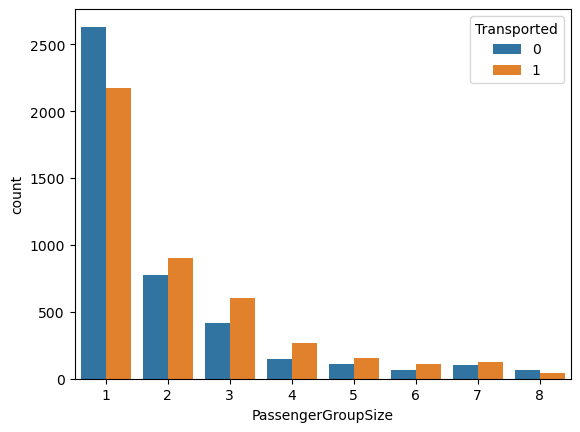

In [20]:
sns.countplot(data=train_data, x='PassengerGroupSize', hue='Transported')

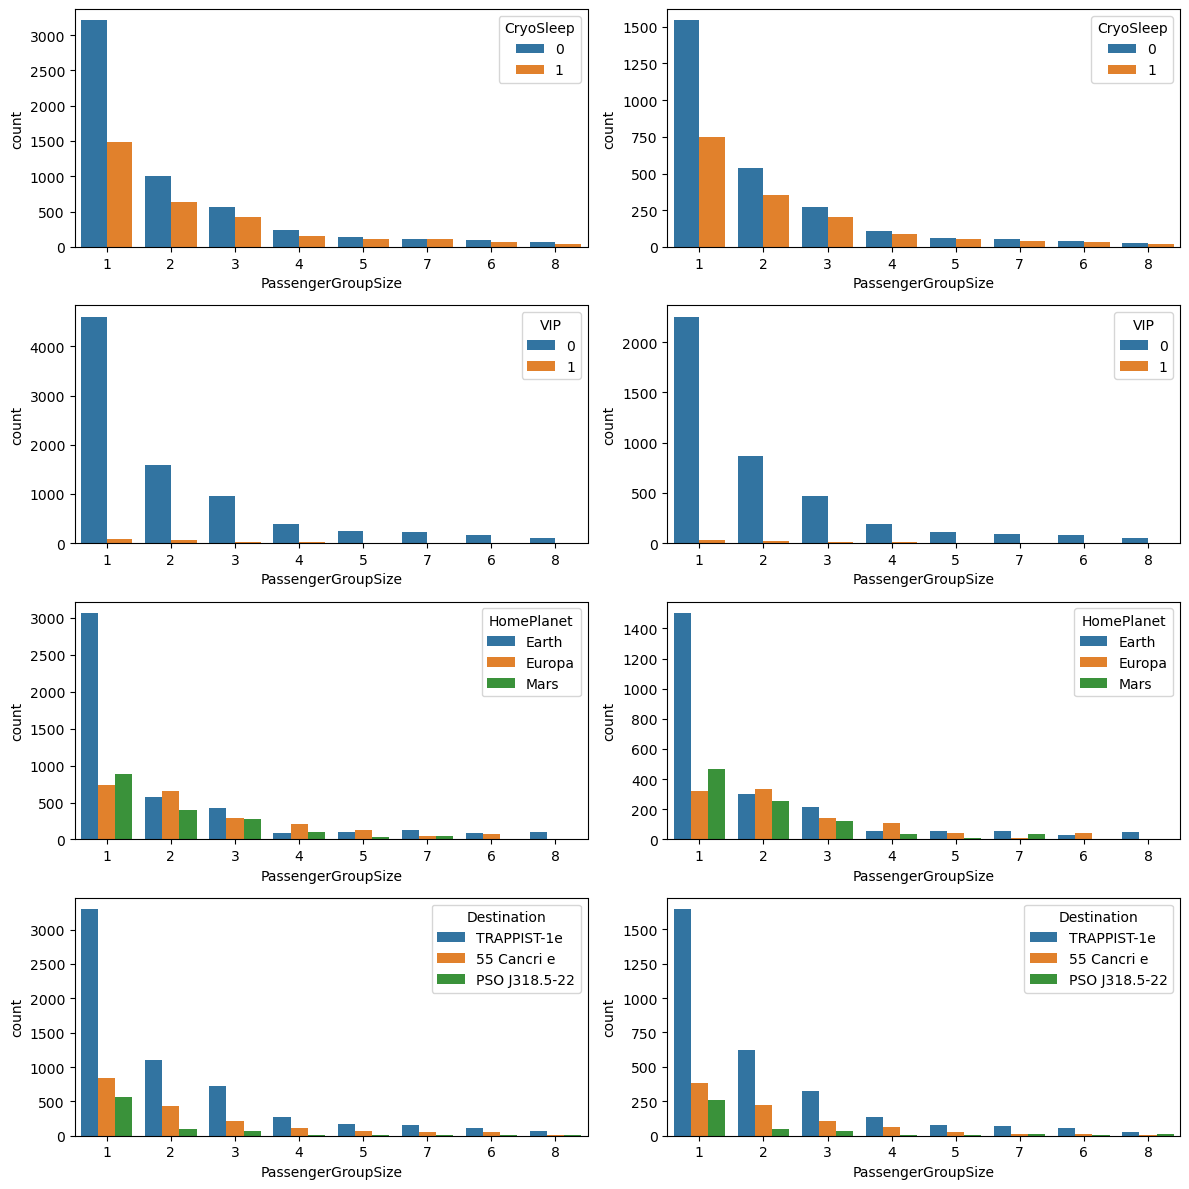

In [51]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(12, 12))

for i, f in enumerate(['CryoSleep', 'VIP', 'HomePlanet', 'Destination']):
    order = train_data['PassengerGroupSize'].value_counts().index
    hue_order = train_data[f].value_counts().index
    sns.countplot(data=train_data, x='PassengerGroupSize', hue=f, order=order, hue_order=hue_order, ax=ax[i, 0])
    sns.countplot(data=test_data, x='PassengerGroupSize', hue=f, order=order, hue_order=hue_order, ax=ax[i, 1])

fig.tight_layout()

## Alone

In [7]:
train_data['Alone'] = train_data['PassengerGroupSize'].apply(lambda x: 1 if x == 1 else 0)
test_data['Alone'] = test_data['PassengerGroupSize'].apply(lambda x: 1 if x == 1 else 0)

In [20]:
train_data['Alone'].value_counts()

Alone
1    4805
0    3888
Name: count, dtype: int64

In [21]:
test_data['Alone'].value_counts()

Alone
1    2340
0    1937
Name: count, dtype: int64

In [22]:
train_data['Alone'].corr(train_data['Transported'])

-0.11379161984870108

In [24]:
train_data[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CryoSleep', 'VIP']].corrwith(train_data['Alone'])

Age             0.135174
RoomService     0.020116
FoodCourt      -0.067533
ShoppingMall    0.029211
Spa            -0.043821
VRDeck         -0.044424
CryoSleep      -0.095697
VIP            -0.034373
dtype: float64

In [27]:
test_data[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CryoSleep', 'VIP']].corrwith(test_data['Alone'])

Age             0.116187
RoomService    -0.009303
FoodCourt      -0.045922
ShoppingMall    0.032283
Spa            -0.049371
VRDeck         -0.042664
CryoSleep      -0.095714
VIP            -0.034219
dtype: float64

<Axes: xlabel='Alone', ylabel='count'>

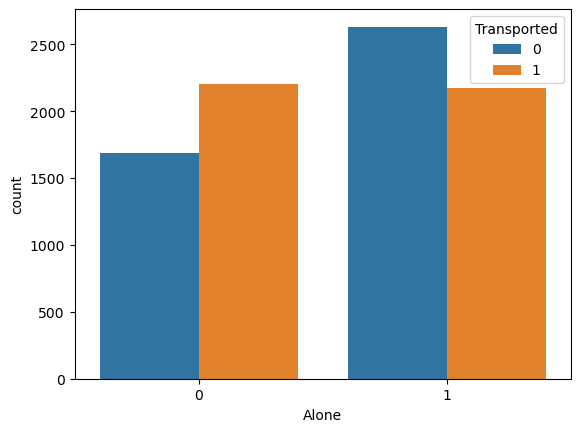

In [30]:
sns.countplot(data=train_data, x='Alone', hue='Transported')

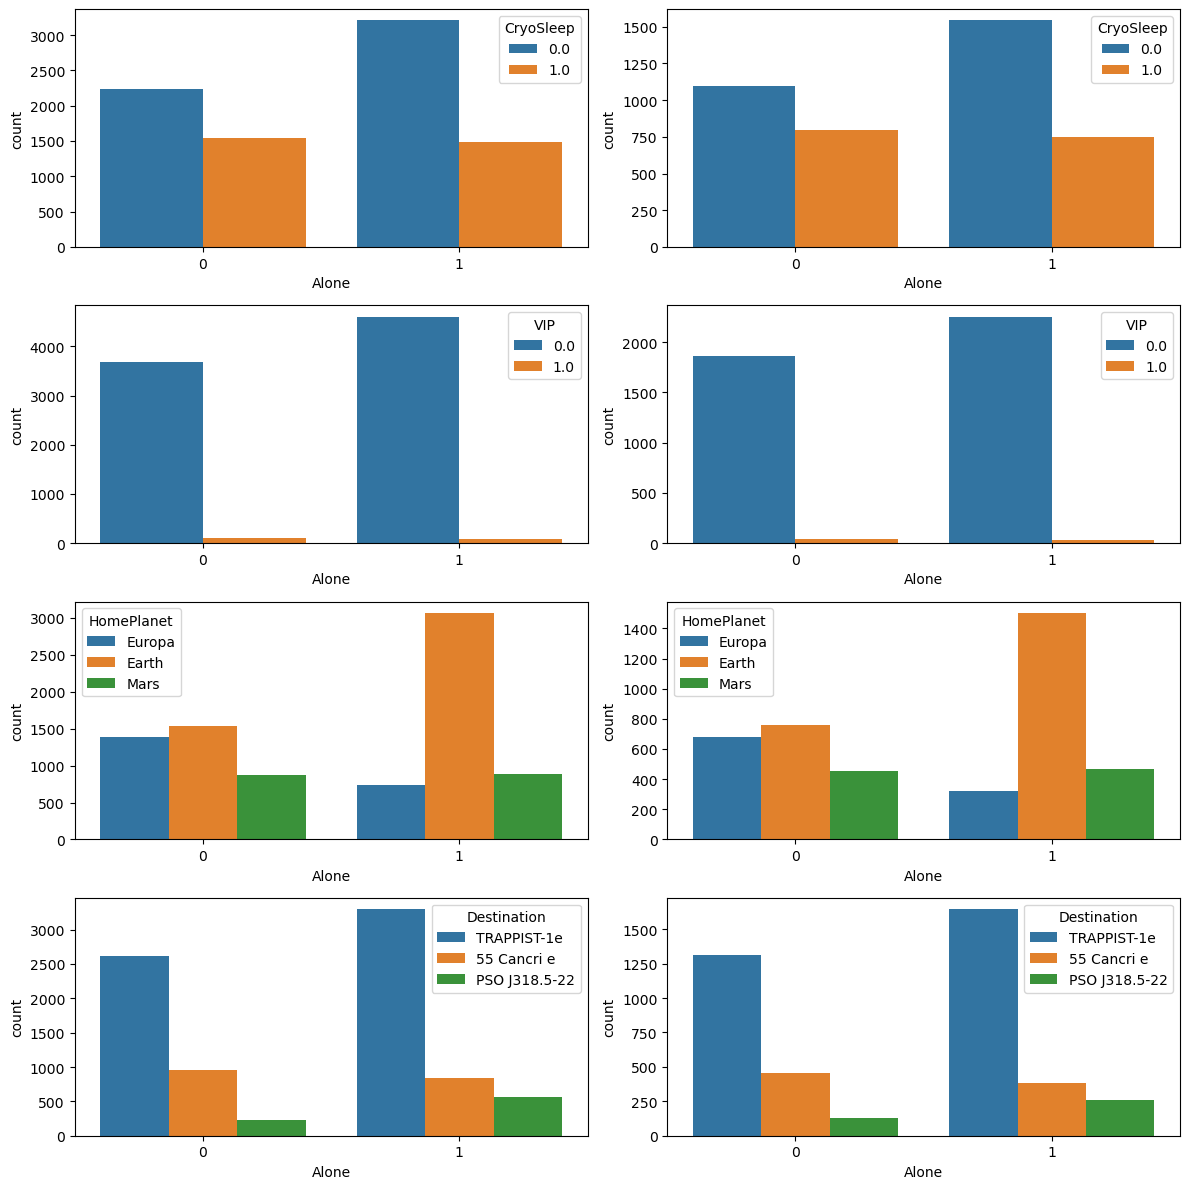

In [31]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(12, 12))

for i, f in enumerate(['CryoSleep', 'VIP', 'HomePlanet', 'Destination']):
    sns.countplot(data=train_data, x='Alone', hue=f, ax=ax[i, 0])
    sns.countplot(data=test_data, x='Alone', hue=f, ax=ax[i, 1])

fig.tight_layout()

## Cabin

In [8]:
train_data[['CabinDeck', 'CabinNum', 'CabinSide']] = train_data['Cabin'].fillna('_/_/_').str.split('/', expand=True)
test_data[['CabinDeck', 'CabinNum', 'CabinSide']] = test_data['Cabin'].fillna('_/_/_').str.split('/', expand=True)

In [32]:
train_data['CabinDeck'].value_counts()

CabinDeck
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
_     199
T       5
Name: count, dtype: int64

In [33]:
test_data['CabinDeck'].value_counts()

CabinDeck
F    1445
G    1222
E     447
B     362
C     355
D     242
_     100
A      98
T       6
Name: count, dtype: int64

<Axes: xlabel='CabinDeck', ylabel='count'>

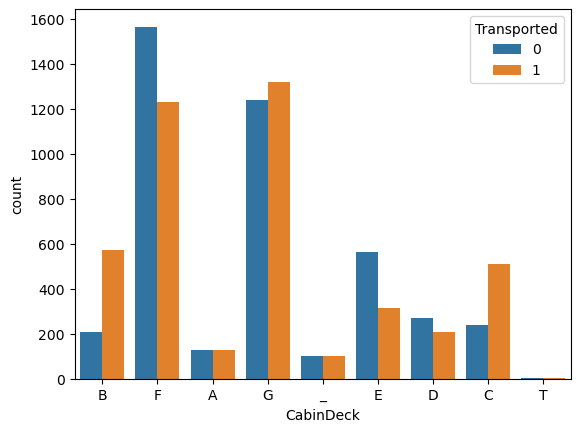

In [38]:
sns.countplot(data=train_data, x='CabinDeck', hue='Transported')

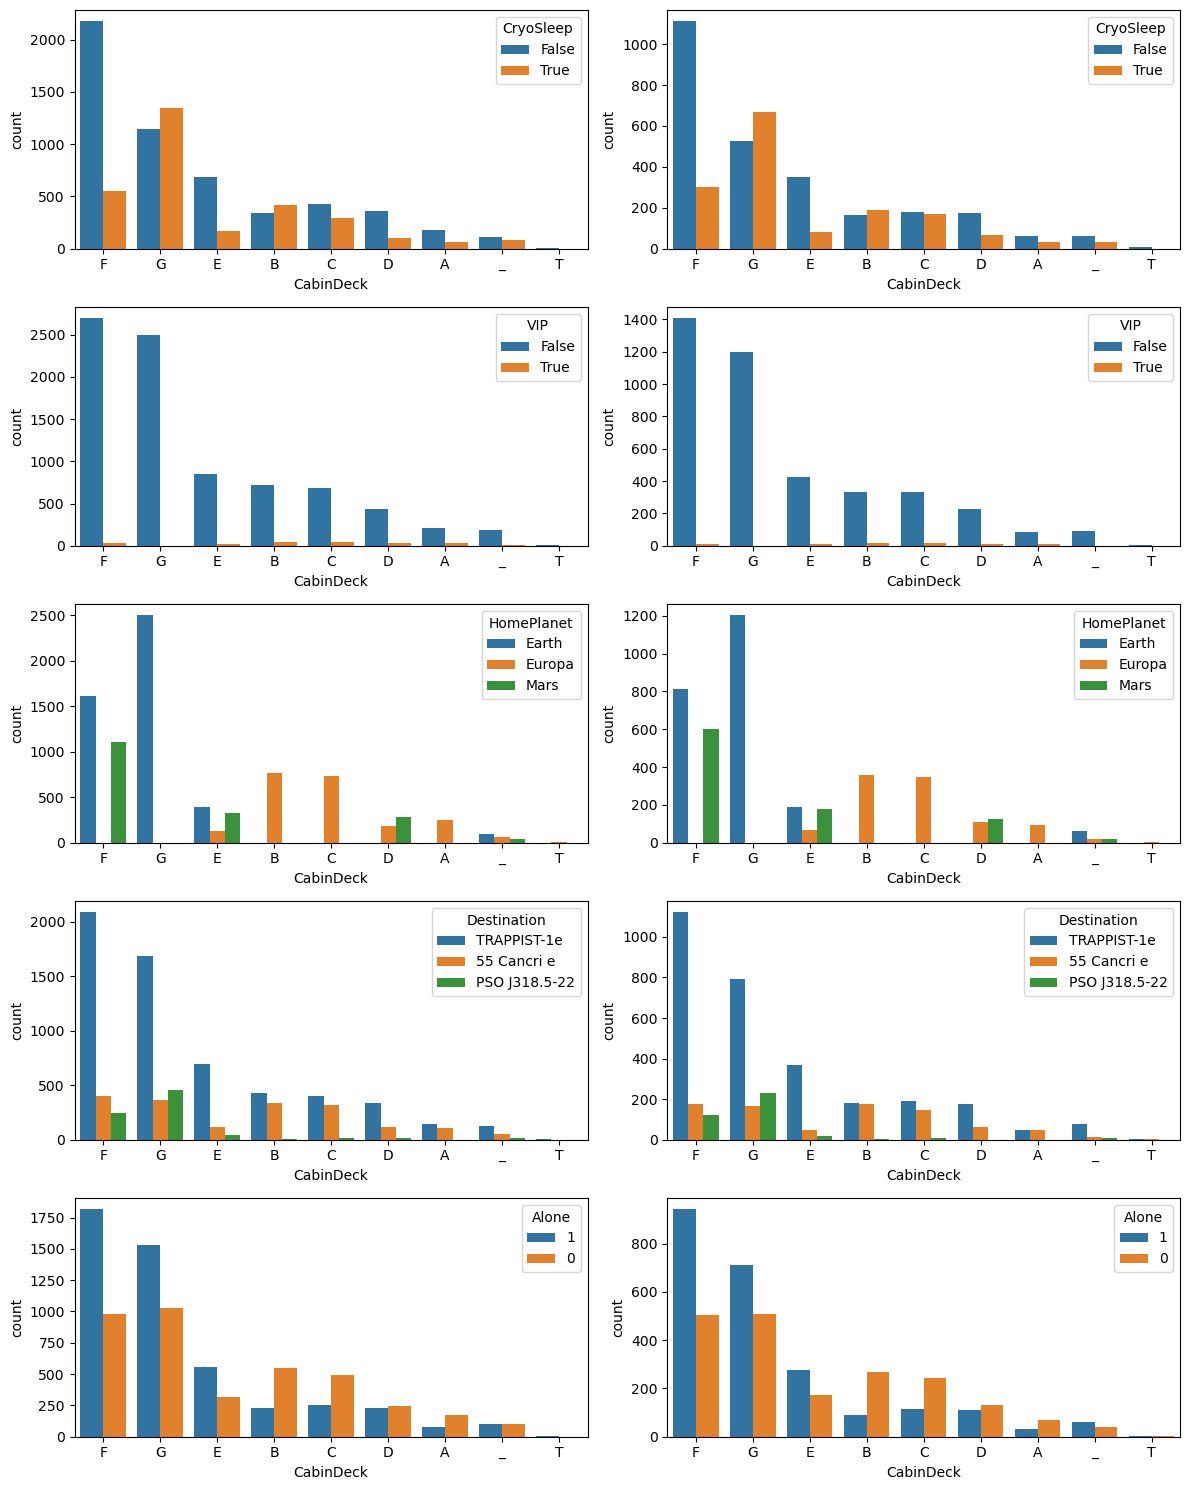

In [8]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(12, 15))

for i, f in enumerate(['CryoSleep', 'VIP', 'HomePlanet', 'Destination', 'Alone']):
    order = train_data['CabinDeck'].value_counts().index
    hue_order = train_data[f].value_counts().index
    sns.countplot(data=train_data, x='CabinDeck', hue=f, order=order, hue_order=hue_order, ax=ax[i, 0])
    sns.countplot(data=test_data, x='CabinDeck', hue=f, order=order, hue_order=hue_order, ax=ax[i, 1])

fig.tight_layout()

In [39]:
groupby = train_data.groupby(by=['CabinDeck', 'PassengerGroup']).size().unstack()
(groupby > 0).sum().value_counts()

1    5709
2     477
3      28
4       3
Name: count, dtype: int64

In [40]:
groupby = test_data.groupby(by=['CabinDeck', 'PassengerGroup']).size().unstack()
(groupby > 0).sum().value_counts()

1    2781
2     264
3      18
Name: count, dtype: int64

In [30]:
train_data['CabinSide'].value_counts()

CabinSide
S    4288
P    4206
_     199
Name: count, dtype: int64

In [34]:
test_data['CabinSide'].value_counts()

CabinSide
S    2093
P    2084
_     100
Name: count, dtype: int64

In [36]:
train_data[['Transported', 'CryoSleep', 'VIP', 'CabinSide']].groupby(by='CabinSide').mean()

,Transported,CryoSleep,VIP
CabinSide,,,
P,0.451260,0.346934,0.024799
S,0.555037,0.365784,0.02175
_,0.502513,0.4375,0.031088


In [56]:
test_data[['CryoSleep', 'VIP', 'CabinSide']].groupby(by='CabinSide').mean()

,CryoSleep
CabinSide,
P,0.368989
S,0.369449
_,0.360825


In [46]:
groupby = train_data.groupby(by=['CabinSide', 'PassengerGroup']).size().unstack()
(groupby > 0).sum().value_counts()

1    6117
2     100
Name: count, dtype: int64

In [47]:
groupby = test_data.groupby(by=['CabinSide', 'PassengerGroup']).size().unstack()
(groupby > 0).sum().value_counts()

1    3027
2      36
Name: count, dtype: int64

In [35]:
train_data['CabinNum'].describe()

count     8693
unique    1818
top          _
freq       199
Name: CabinNum, dtype: object

In [36]:
test_data['CabinNum'].describe()

count     4277
unique    1506
top          _
freq       100
Name: CabinNum, dtype: object

## Total Spending

In [12]:
train_data['TotalSpending'] = train_data[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
test_data['TotalSpending'] = test_data[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

In [15]:
train_data['TotalSpending'].corr(train_data['Transported'])

-0.19951424346781862

In [14]:
train_data[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CryoSleep', 'VIP', 'Alone']].corrwith(train_data['TotalSpending'])

Age             0.186530
RoomService     0.237998
FoodCourt       0.745105
ShoppingMall    0.222310
Spa             0.596633
VRDeck          0.586299
CryoSleep      -0.383115
VIP             0.164831
Alone          -0.062643
dtype: float64

In [16]:
test_data[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CryoSleep', 'VIP', 'Alone']].corrwith(test_data['TotalSpending'])

Age             0.166078
RoomService     0.198656
FoodCourt       0.754434
ShoppingMall    0.245645
Spa             0.586009
VRDeck          0.641121
CryoSleep      -0.384672
VIP             0.178350
Alone          -0.057751
dtype: float64

<Axes: xlabel='TotalSpending', ylabel='Count'>

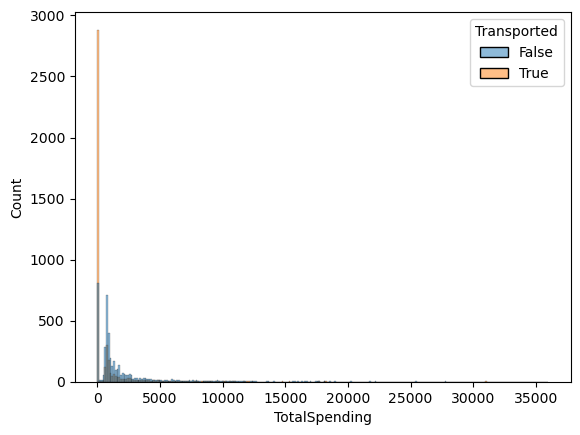

In [8]:
sns.histplot(train_data, x='TotalSpending', hue='Transported')

<Axes: xlabel='TotalSpending', ylabel='Age'>

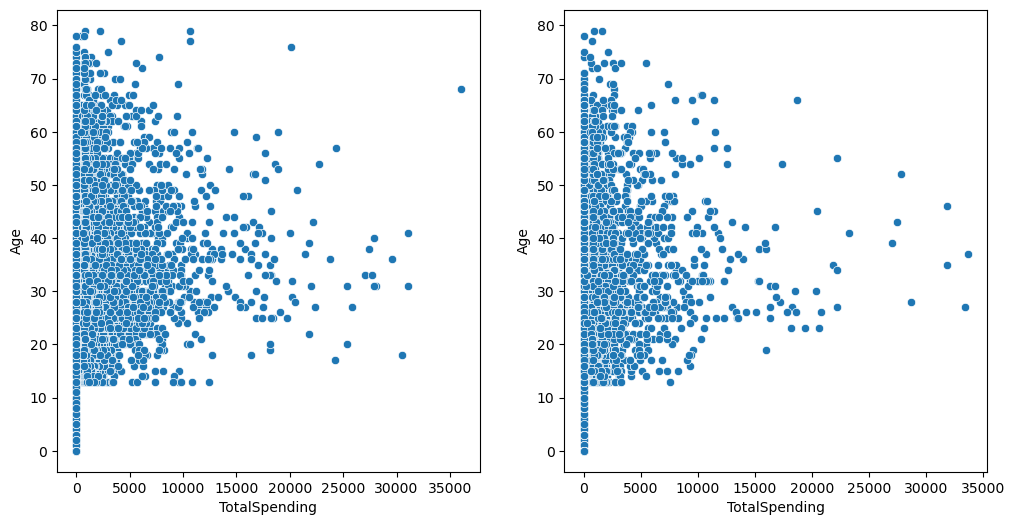

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.scatterplot(data=train_data, x='TotalSpending', y='Age', ax=ax[0])
sns.scatterplot(data=test_data, x='TotalSpending', y='Age', ax=ax[1])

In [15]:
train_data.loc[train_data['TotalSpending']>0, 'Age'].min()

13.0

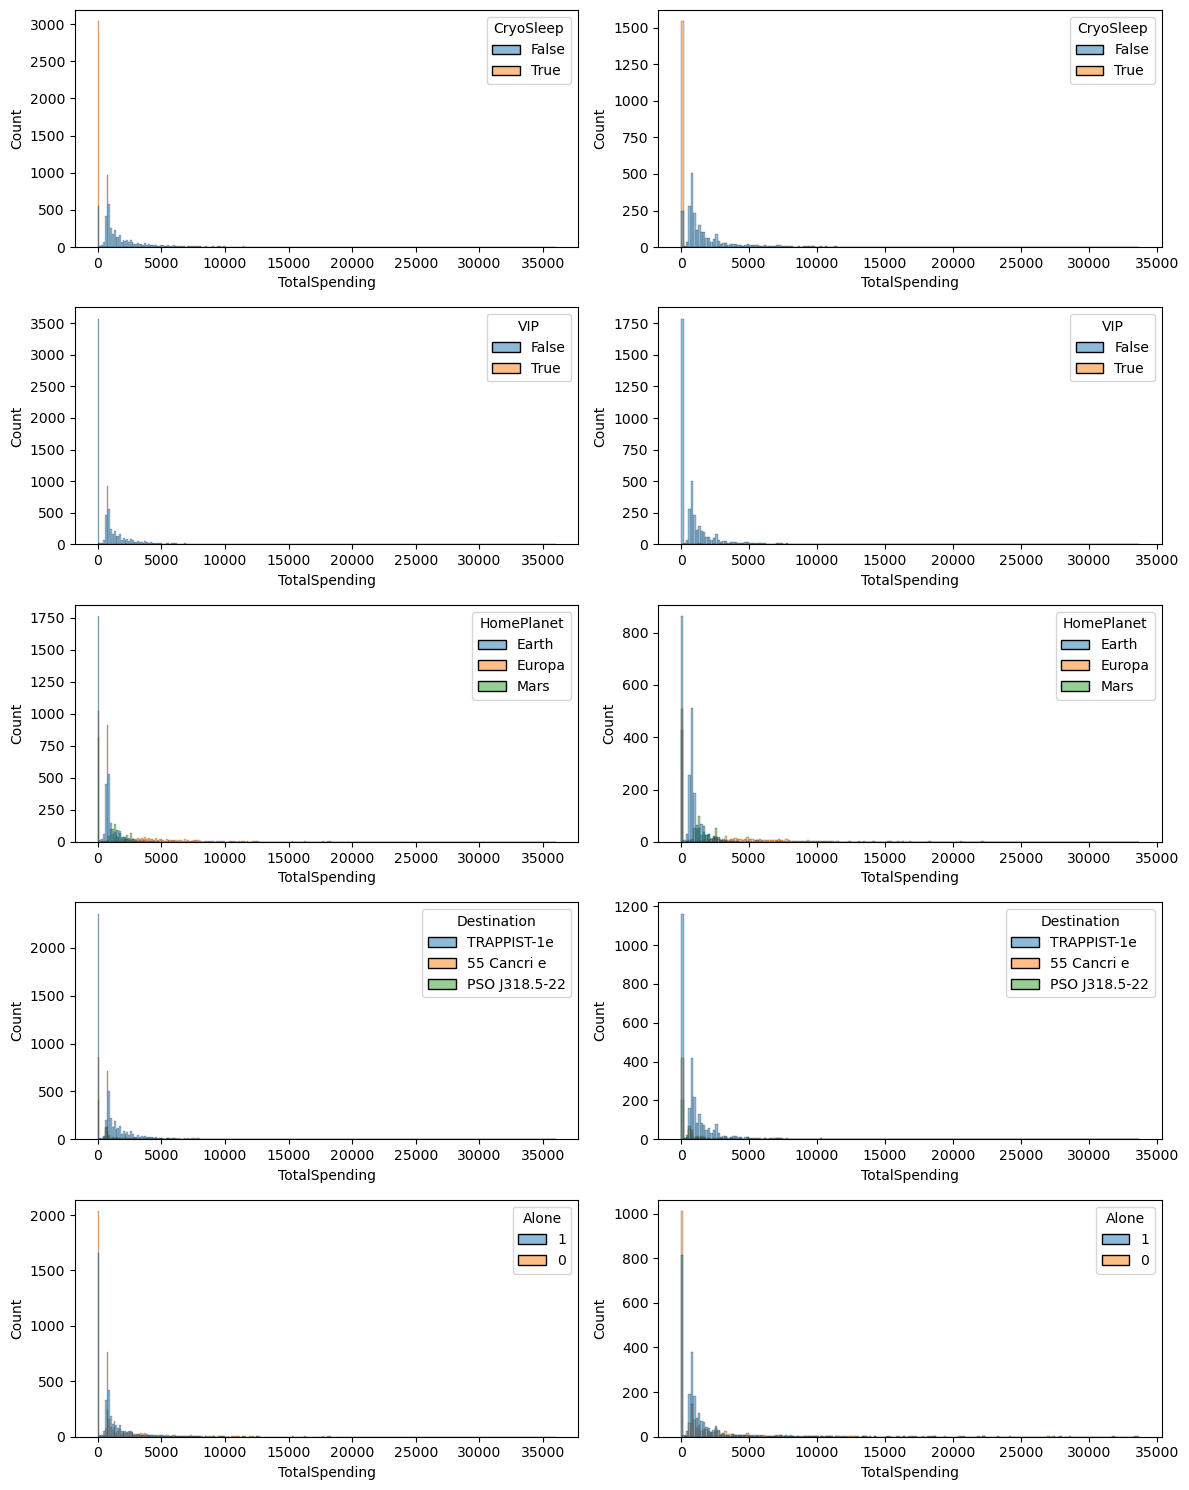

In [18]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(12, 15))

for i, f in enumerate(['CryoSleep', 'VIP', 'HomePlanet', 'Destination', 'Alone']):
    hue_order = train_data[f].value_counts().index
    sns.histplot(data=train_data, x='TotalSpending', hue=f, hue_order=hue_order, ax=ax[i, 0])
    sns.histplot(data=test_data, x='TotalSpending', hue=f, hue_order=hue_order, ax=ax[i, 1])

fig.tight_layout()

In [10]:
train_data['TotalSpending_Log'] = np.log1p(train_data['TotalSpending'])
test_data['TotalSpending_Log'] = np.log1p(test_data['TotalSpending'])

In [20]:
train_data[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CryoSleep', 'VIP', 'Alone']].corrwith(train_data['TotalSpending_Log'])

Age             0.247579
RoomService     0.318447
FoodCourt       0.341315
ShoppingMall    0.268435
Spa             0.312725
VRDeck          0.305219
CryoSleep      -0.862748
VIP             0.115325
Alone           0.144268
dtype: float64

In [21]:
test_data[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CryoSleep', 'VIP', 'Alone']].corrwith(test_data['TotalSpending_Log'])

Age             0.205159
RoomService     0.336502
FoodCourt       0.344859
ShoppingMall    0.298864
Spa             0.309339
VRDeck          0.293450
CryoSleep      -0.878818
VIP             0.116299
Alone           0.140734
dtype: float64

<Axes: xlabel='TotalSpending_Log', ylabel='Count'>

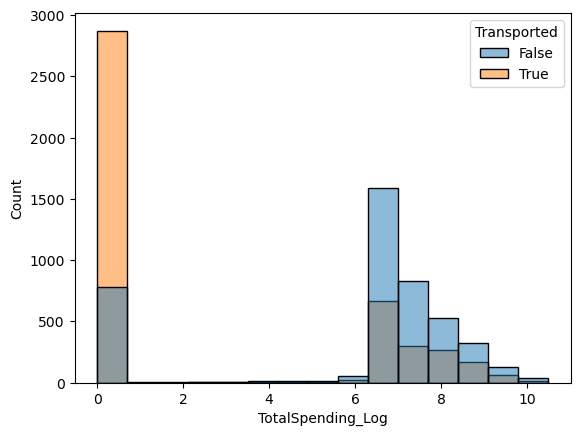

In [22]:
sns.histplot(train_data, x='TotalSpending_Log', hue='Transported')

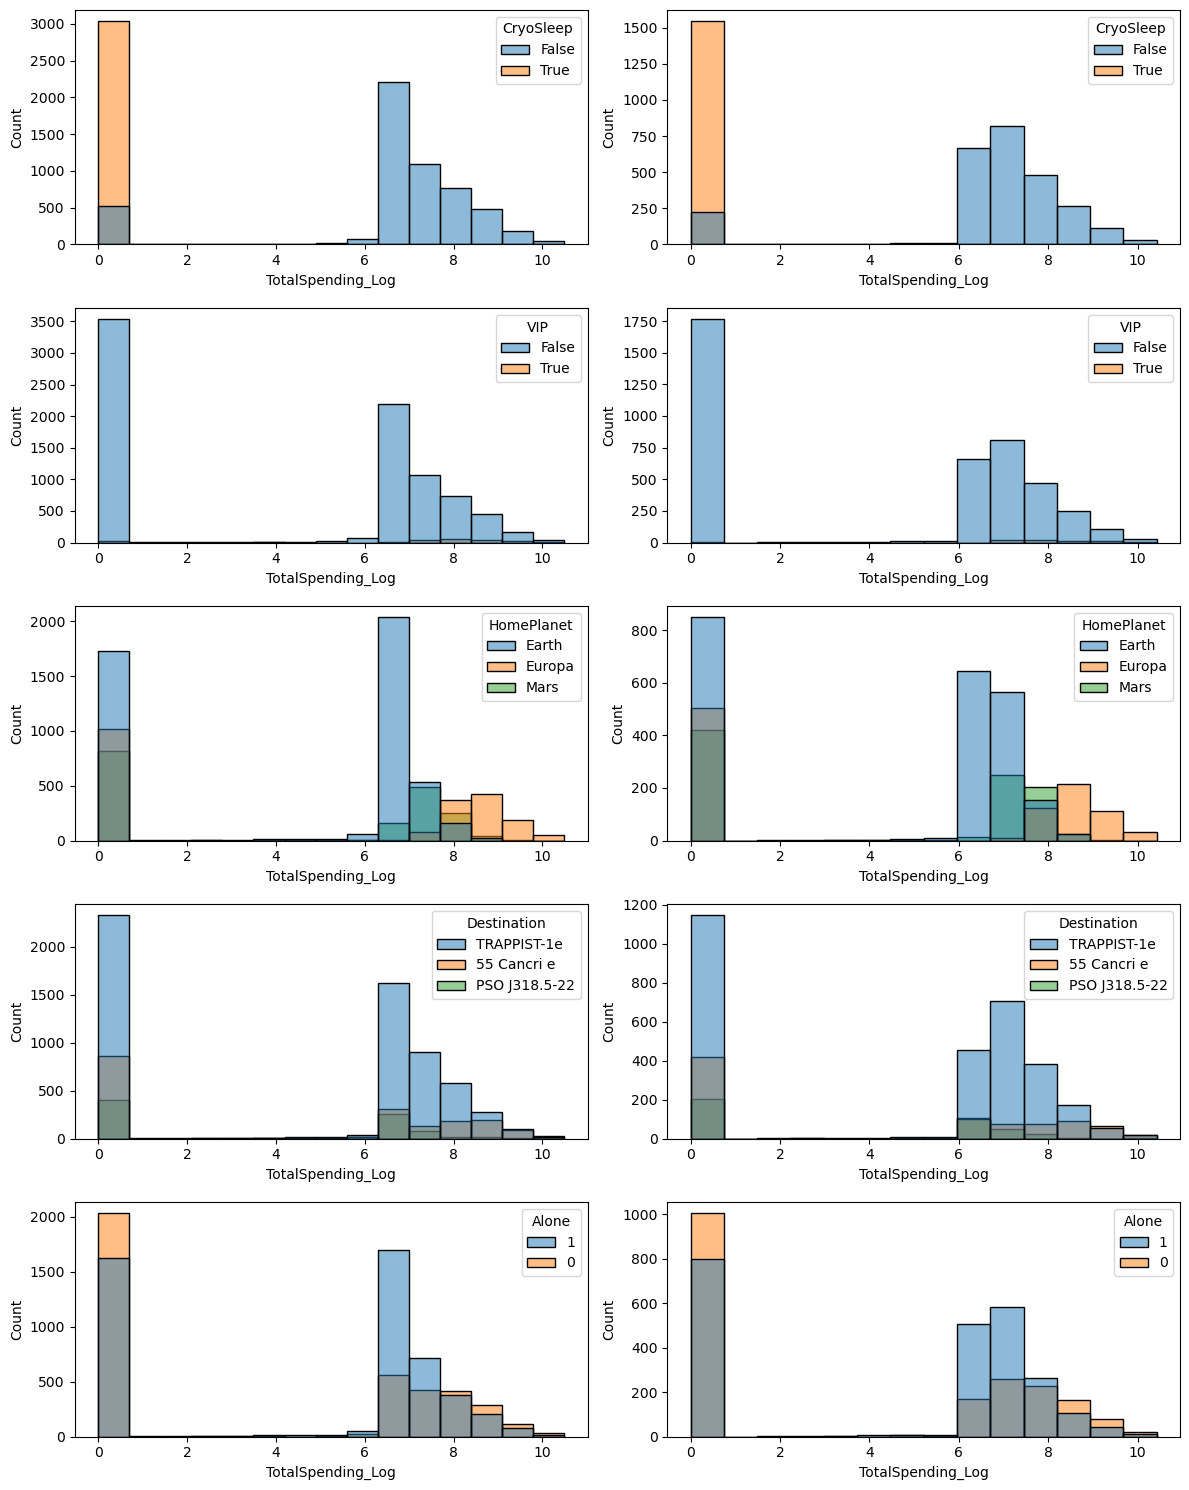

In [23]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(12, 15))

for i, f in enumerate(['CryoSleep', 'VIP', 'HomePlanet', 'Destination', 'Alone']):
    hue_order = train_data[f].value_counts().index
    sns.histplot(data=train_data, x='TotalSpending_Log', hue=f, hue_order=hue_order, ax=ax[i, 0])
    sns.histplot(data=test_data, x='TotalSpending_Log', hue=f, hue_order=hue_order, ax=ax[i, 1])

fig.tight_layout()

## Luxury Spending

In [11]:
train_data['LuxurySpending'] = train_data[['RoomService', 'Spa', 'VRDeck']].sum(axis=1)
test_data['LuxurySpending'] = test_data[['RoomService', 'Spa', 'VRDeck']].sum(axis=1)

In [29]:
train_data['LuxurySpending'].corr(train_data['Transported'])

-0.34824440142207336

In [31]:
train_data[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CryoSleep', 'VIP', 'Alone', 'TotalSpending', 'TotalSpending_Log']].corrwith(train_data['LuxurySpending'])

Age                  0.162509
RoomService          0.360074
FoodCourt            0.271666
ShoppingMall         0.023233
Spa                  0.719606
VRDeck               0.704290
CryoSleep           -0.335677
VIP                  0.135740
Alone               -0.047287
TotalSpending        0.811683
TotalSpending_Log    0.491891
dtype: float64

In [43]:
test_data[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CryoSleep', 'VIP', 'Alone', 'TotalSpending', 'TotalSpending_Log']].corrwith(test_data['LuxurySpending'])

Age                  0.151624
RoomService          0.306532
FoodCourt            0.320151
ShoppingMall         0.042692
Spa                  0.696159
VRDeck               0.738990
CryoSleep           -0.336591
VIP                  0.159351
Alone               -0.060039
TotalSpending        0.836120
TotalSpending_Log    0.483686
dtype: float64

<Axes: xlabel='LuxurySpending', ylabel='Count'>

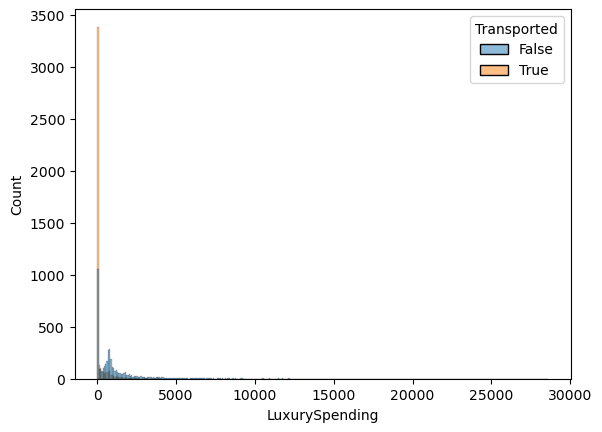

In [12]:
sns.histplot(train_data, x='LuxurySpending', hue='Transported')

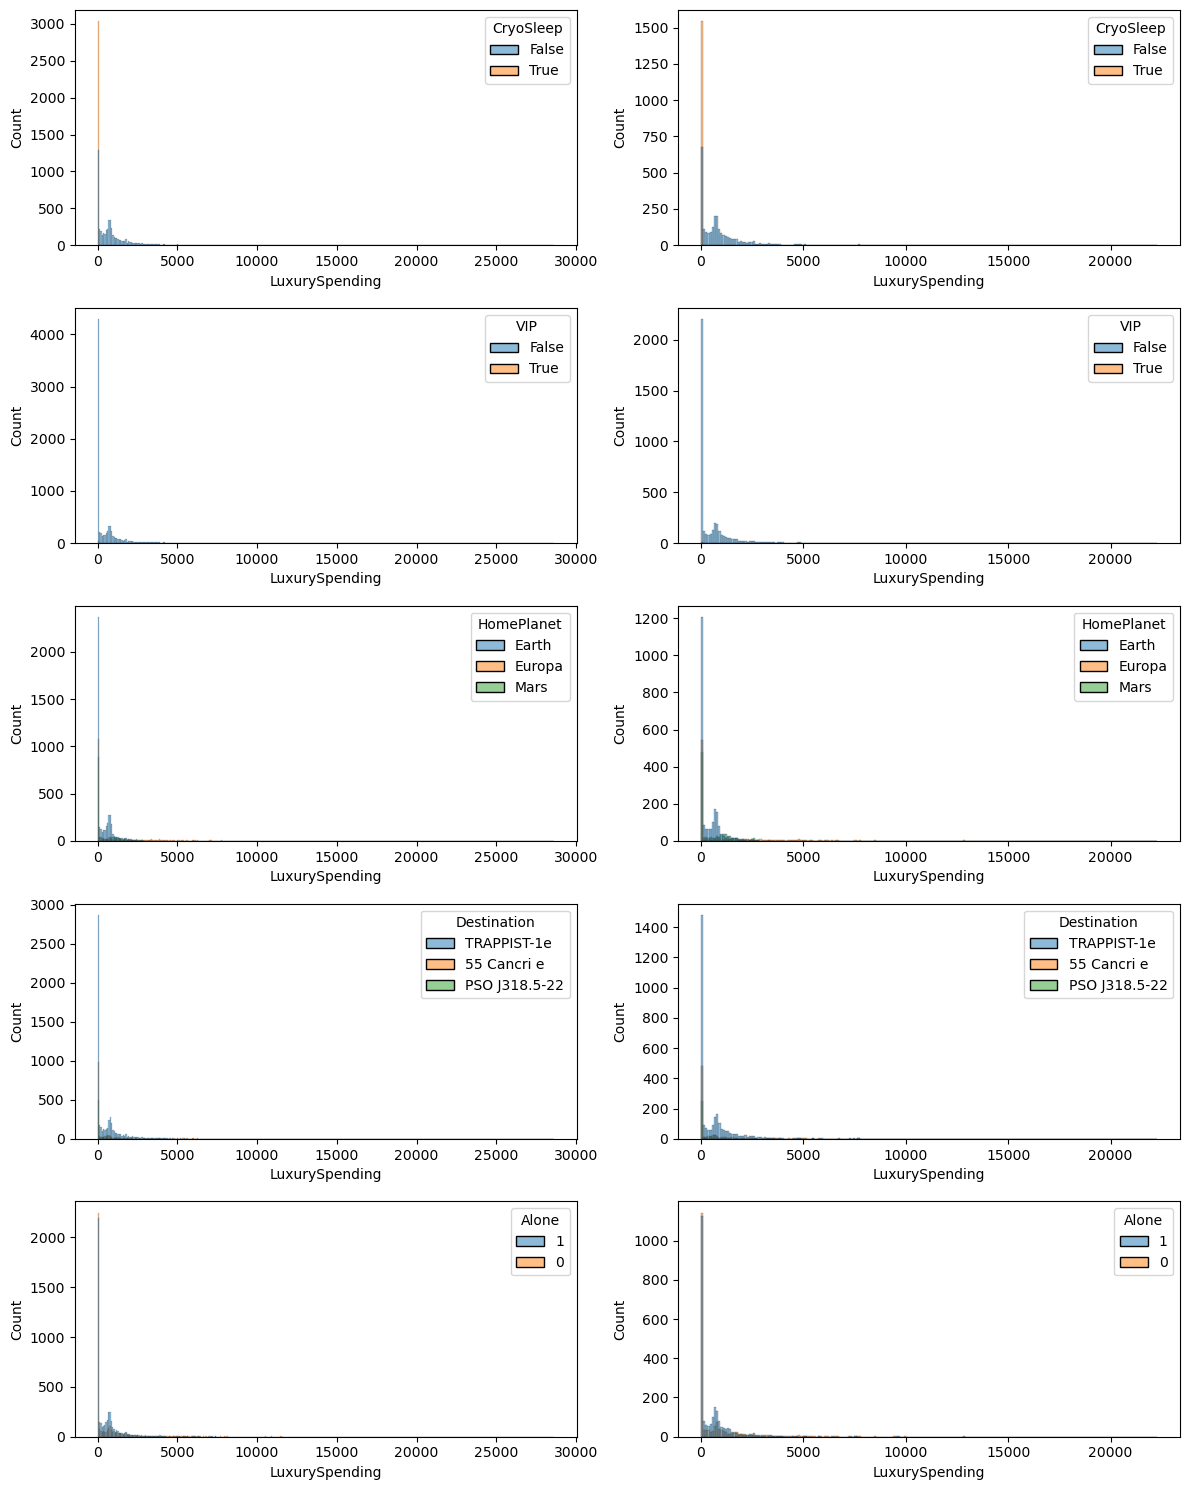

In [32]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(12, 15))

for i, f in enumerate(['CryoSleep', 'VIP', 'HomePlanet', 'Destination', 'Alone']):
    hue_order = train_data[f].value_counts().index
    sns.histplot(data=train_data, x='LuxurySpending', hue=f, hue_order=hue_order, ax=ax[i, 0])
    sns.histplot(data=test_data, x='LuxurySpending', hue=f, hue_order=hue_order, ax=ax[i, 1])

fig.tight_layout()

In [12]:
train_data['LuxurySpending_Log'] = np.log1p(train_data['LuxurySpending'])
test_data['LuxurySpending_Log'] = np.log1p(test_data['LuxurySpending'])

In [37]:
train_data['LuxurySpending_Log'].corr(train_data['Transported'])

-0.5550325555510303

In [35]:
train_data[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CryoSleep', 'VIP', 'Alone', 'TotalSpending', 'TotalSpending_Log']].corrwith(train_data['LuxurySpending_Log'])

Age                  0.239505
RoomService          0.388382
FoodCourt            0.248871
ShoppingMall         0.138447
Spa                  0.367908
VRDeck               0.357639
CryoSleep           -0.781794
VIP                  0.116256
Alone                0.116734
TotalSpending        0.550858
TotalSpending_Log    0.916285
dtype: float64

In [42]:
test_data[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CryoSleep', 'VIP', 'Alone', 'TotalSpending', 'TotalSpending_Log']].corrwith(test_data['LuxurySpending_Log'])

Age                  0.202111
RoomService          0.412622
FoodCourt            0.250402
ShoppingMall         0.161337
Spa                  0.366843
VRDeck               0.345662
CryoSleep           -0.785845
VIP                  0.116877
Alone                0.102021
TotalSpending        0.544926
TotalSpending_Log    0.905616
dtype: float64

<Axes: xlabel='LuxurySpending_Log', ylabel='Count'>

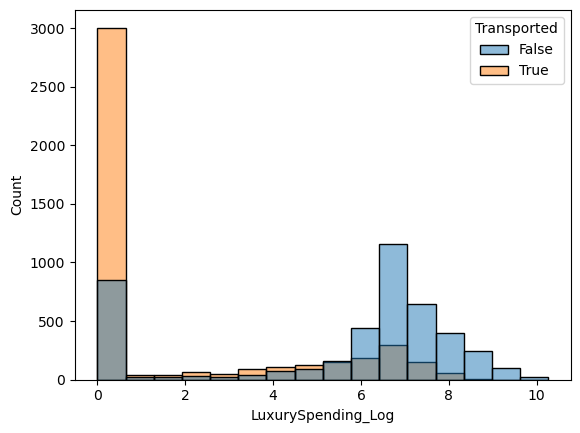

In [36]:
sns.histplot(train_data, x='LuxurySpending_Log', hue='Transported')

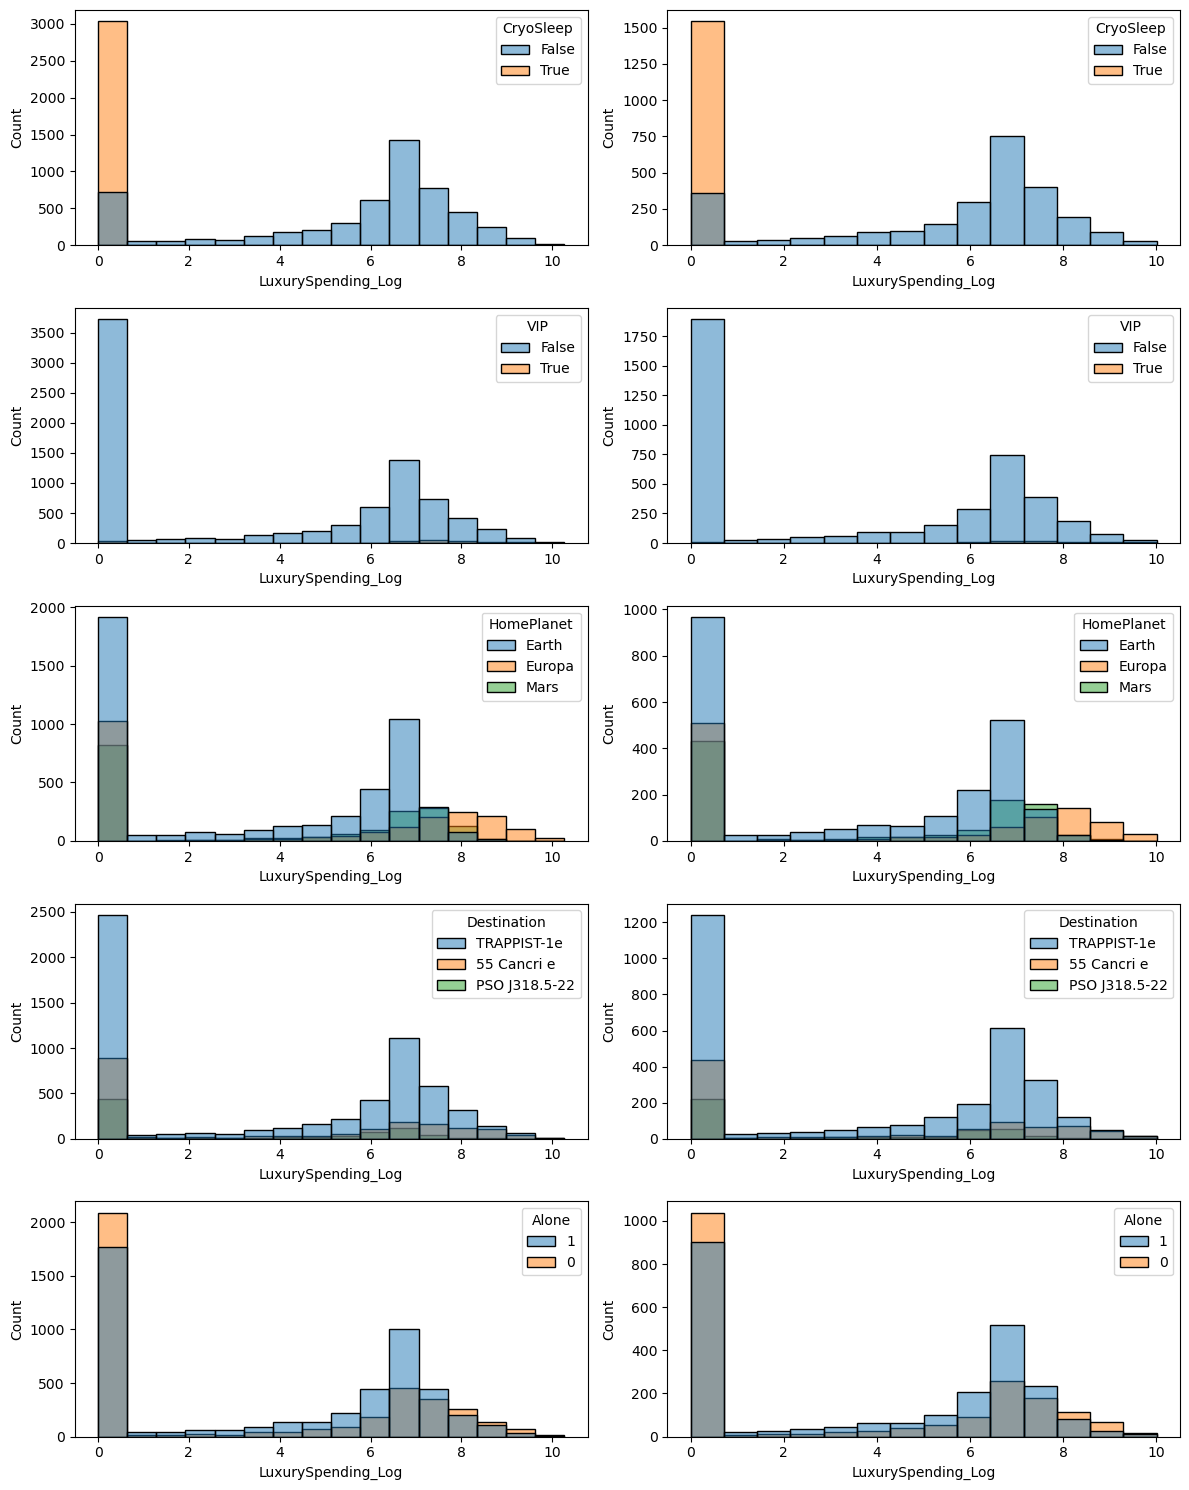

In [38]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(12, 15))

for i, f in enumerate(['CryoSleep', 'VIP', 'HomePlanet', 'Destination', 'Alone']):
    hue_order = train_data[f].value_counts().index
    sns.histplot(data=train_data, x='LuxurySpending_Log', hue=f, hue_order=hue_order, ax=ax[i, 0])
    sns.histplot(data=test_data, x='LuxurySpending_Log', hue=f, hue_order=hue_order, ax=ax[i, 1])

fig.tight_layout()

## Essential Spending

In [13]:
train_data['EssentialSpending'] = train_data[['FoodCourt', 'ShoppingMall']].sum(axis=1)
test_data['EssentialSpending'] = test_data[['FoodCourt', 'ShoppingMall']].sum(axis=1)

In [40]:
train_data['EssentialSpending'].corr(train_data['Transported'])

0.04618878900194243

In [41]:
train_data[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CryoSleep', 'VIP', 'Alone', 'TotalSpending', 'TotalSpending_Log', 'LuxurySpending', 'LuxurySpending_Log']].corrwith(train_data['EssentialSpending'])

Age                   0.132454
RoomService           0.004176
FoodCourt             0.937122
ShoppingMall          0.341623
Spa                   0.213607
VRDeck                0.208612
CryoSleep            -0.271535
VIP                   0.126004
Alone                -0.052470
TotalSpending         0.776278
TotalSpending_Log     0.412238
LuxurySpending        0.261881
LuxurySpending_Log    0.280315
dtype: float64

In [44]:
test_data[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CryoSleep', 'VIP', 'Alone', 'TotalSpending', 'TotalSpending_Log', 'LuxurySpending', 'LuxurySpending_Log']].corrwith(test_data['EssentialSpending'])

Age                   0.115539
RoomService          -0.006898
FoodCourt             0.940800
ShoppingMall          0.370610
Spa                   0.221730
VRDeck                0.265877
CryoSleep            -0.283190
VIP                   0.129059
Alone                -0.031442
TotalSpending         0.777653
TotalSpending_Log     0.417956
LuxurySpending        0.305345
LuxurySpending_Log    0.283690
dtype: float64

<Axes: xlabel='EssentialSpending', ylabel='Count'>

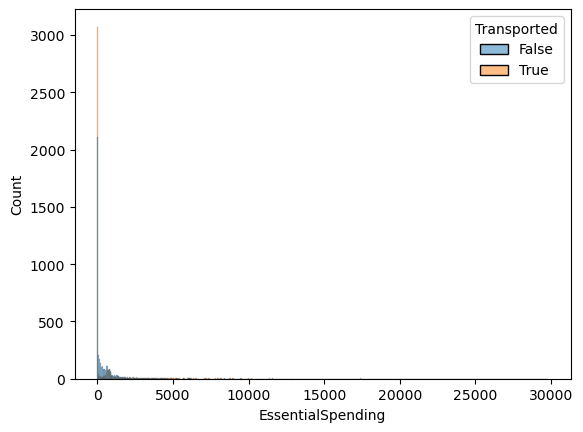

In [16]:
sns.histplot(train_data, x='EssentialSpending', hue='Transported')

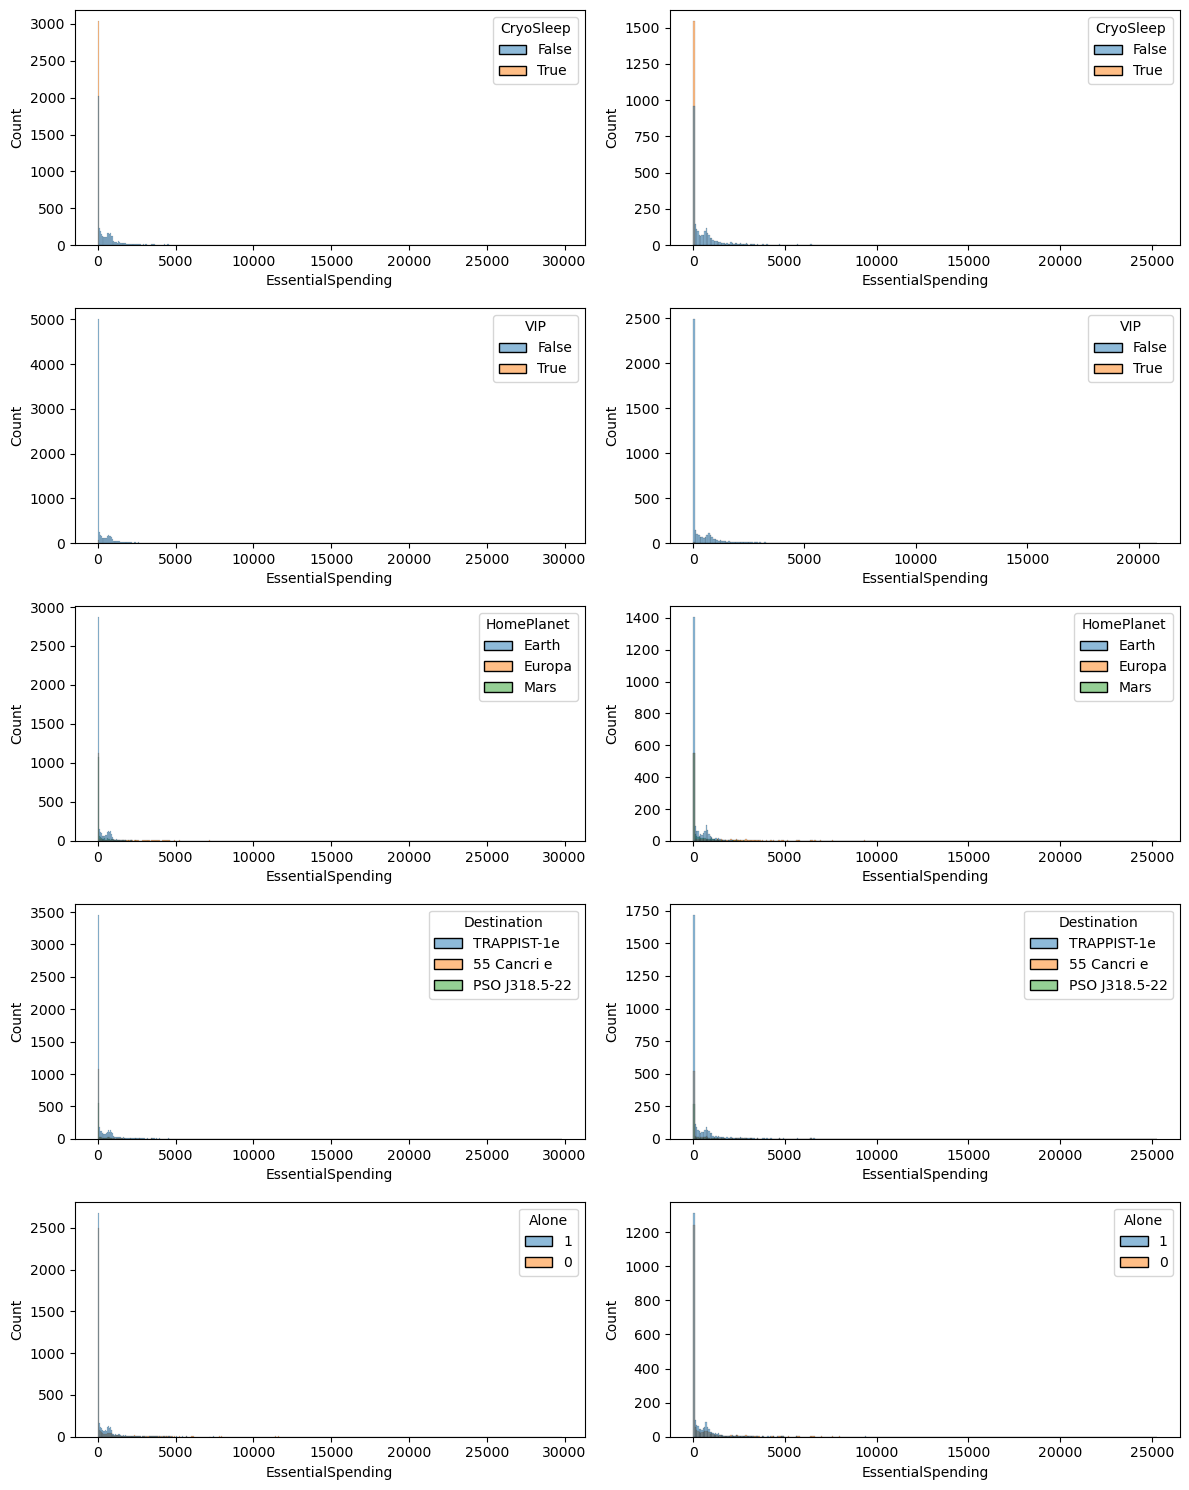

In [45]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(12, 15))

for i, f in enumerate(['CryoSleep', 'VIP', 'HomePlanet', 'Destination', 'Alone']):
    hue_order = train_data[f].value_counts().index
    sns.histplot(data=train_data, x='EssentialSpending', hue=f, hue_order=hue_order, ax=ax[i, 0])
    sns.histplot(data=test_data, x='EssentialSpending', hue=f, hue_order=hue_order, ax=ax[i, 1])

fig.tight_layout()

In [14]:
train_data['EssentialSpending_Log'] = np.log1p(train_data['EssentialSpending'])
test_data['EssentialSpending_Log'] = np.log1p(test_data['EssentialSpending'])

In [47]:
train_data['EssentialSpending_Log'].corr(train_data['Transported'])

-0.23288777431743848

In [48]:
train_data[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CryoSleep', 'VIP', 'Alone', 'TotalSpending', 'TotalSpending_Log', 'LuxurySpending', 'LuxurySpending_Log']].corrwith(train_data['EssentialSpending_Log'])

Age                   0.219671
RoomService           0.143878
FoodCourt             0.464687
ShoppingMall          0.383639
Spa                   0.231013
VRDeck                0.217813
CryoSleep            -0.682580
VIP                   0.118054
Alone                 0.084057
TotalSpending         0.557413
TotalSpending_Log     0.815580
LuxurySpending        0.325351
LuxurySpending_Log    0.622287
dtype: float64

In [49]:
test_data[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CryoSleep', 'VIP', 'Alone', 'TotalSpending', 'TotalSpending_Log', 'LuxurySpending', 'LuxurySpending_Log']].corrwith(test_data['EssentialSpending_Log'])

Age                   0.179080
RoomService           0.151121
FoodCourt             0.464404
ShoppingMall          0.423206
Spa                   0.225699
VRDeck                0.218725
CryoSleep            -0.701836
VIP                   0.129155
Alone                 0.083253
TotalSpending         0.544820
TotalSpending_Log     0.821161
LuxurySpending        0.325045
LuxurySpending_Log    0.613934
dtype: float64

<Axes: xlabel='EssentialSpending_Log', ylabel='Count'>

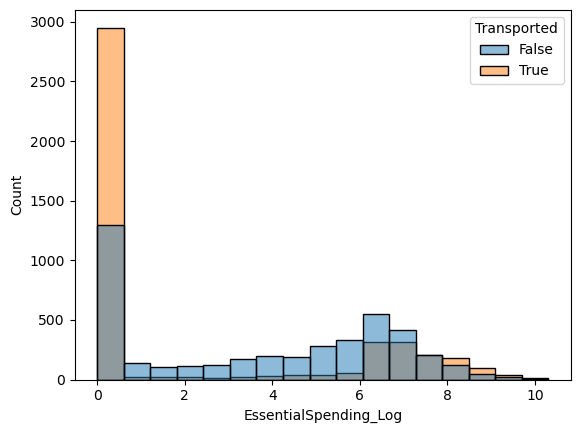

In [50]:
sns.histplot(train_data, x='EssentialSpending_Log', hue='Transported')

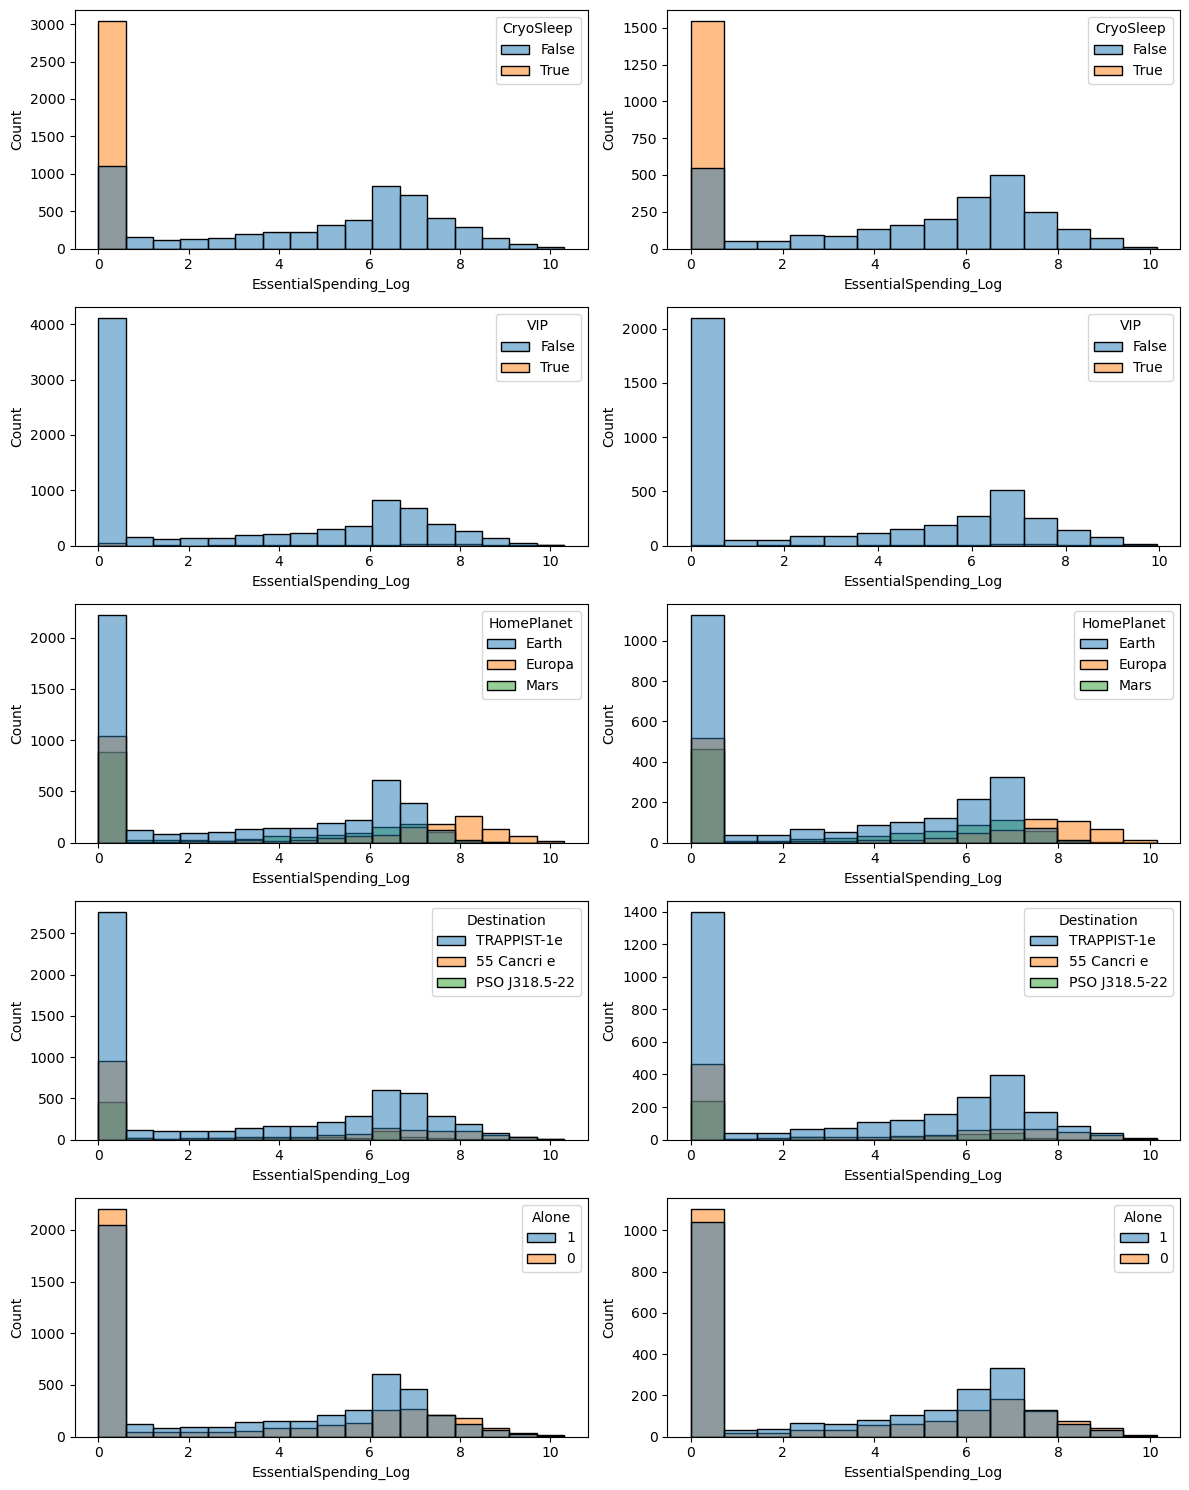

In [51]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(12, 15))

for i, f in enumerate(['CryoSleep', 'VIP', 'HomePlanet', 'Destination', 'Alone']):
    hue_order = train_data[f].value_counts().index
    sns.histplot(data=train_data, x='EssentialSpending_Log', hue=f, hue_order=hue_order, ax=ax[i, 0])
    sns.histplot(data=test_data, x='EssentialSpending_Log', hue=f, hue_order=hue_order, ax=ax[i, 1])

fig.tight_layout()

## Has Spending

In [15]:
train_data['HasSpending'] = train_data['TotalSpending'].apply(lambda x: 1 if x > 0 else 0)
test_data['HasSpending'] = test_data['TotalSpending'].apply(lambda x: 1 if x > 0 else 0)

In [26]:
train_data['HasSpending'].value_counts()

HasSpending
1    5040
0    3653
Name: count, dtype: int64

In [27]:
test_data['HasSpending'].value_counts()

HasSpending
1    2473
0    1804
Name: count, dtype: int64

In [53]:
train_data[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CryoSleep', 'VIP', 'Alone', 'TotalSpending', 'TotalSpending_Log', 'LuxurySpending', 'LuxurySpending_Log', 'EssentialSpending', 'EssentialSpending_Log']].corrwith(train_data['HasSpending'])

Age                      0.230221
RoomService              0.286793
FoodCourt                0.241778
ShoppingMall             0.243392
Spa                      0.233378
VRDeck                   0.226161
CryoSleep               -0.879164
VIP                      0.087475
Alone                    0.185228
TotalSpending            0.437651
TotalSpending_Log        0.981478
LuxurySpending           0.382642
LuxurySpending_Log       0.889280
EssentialSpending        0.310158
EssentialSpending_Log    0.777849
dtype: float64

In [54]:
test_data[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CryoSleep', 'VIP', 'Alone', 'TotalSpending', 'TotalSpending_Log', 'LuxurySpending', 'LuxurySpending_Log', 'EssentialSpending', 'EssentialSpending_Log']].corrwith(test_data['HasSpending'])

Age                      0.188503
RoomService              0.309399
FoodCourt                0.246187
ShoppingMall             0.270484
Spa                      0.230759
VRDeck                   0.212292
CryoSleep               -0.894859
VIP                      0.089264
Alone                    0.178802
TotalSpending            0.429973
TotalSpending_Log        0.982112
LuxurySpending           0.374787
LuxurySpending_Log       0.878965
EssentialSpending        0.316860
EssentialSpending_Log    0.783607
dtype: float64

<Axes: xlabel='HasSpending', ylabel='count'>

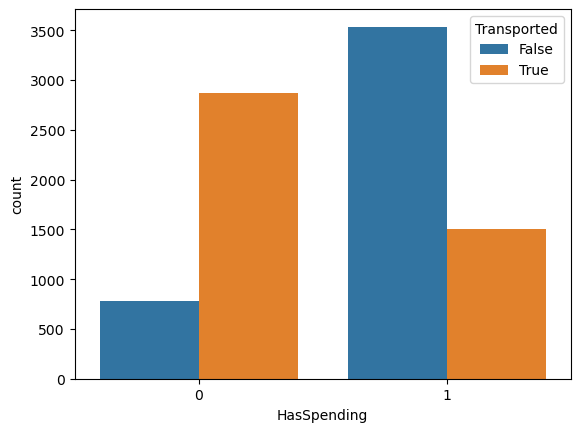

In [55]:
sns.countplot(data=train_data, x='HasSpending', hue='Transported')

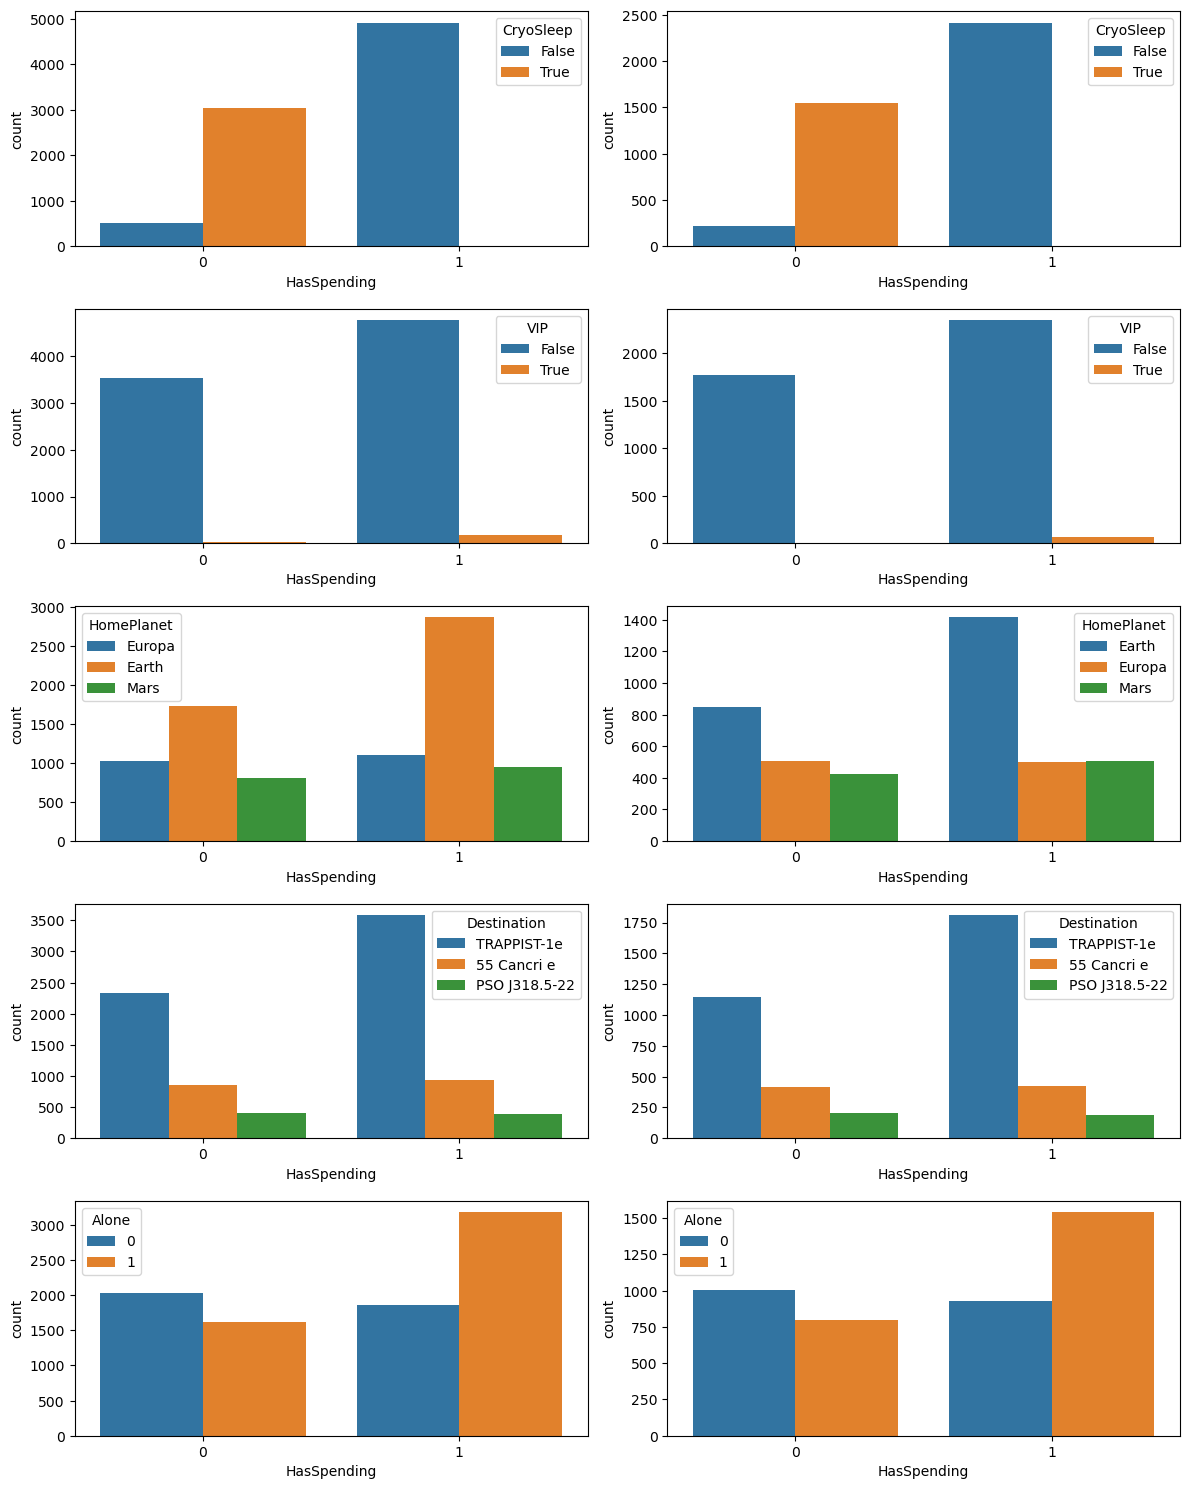

In [57]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(12, 15))

for i, f in enumerate(['CryoSleep', 'VIP', 'HomePlanet', 'Destination', 'Alone']):
    sns.countplot(data=train_data, x='HasSpending', hue=f, ax=ax[i, 0])
    sns.countplot(data=test_data, x='HasSpending', hue=f, ax=ax[i, 1])

fig.tight_layout()

## Last Name

In [4]:
train_data['LastName'] = train_data['Name'].fillna('_ _').apply(lambda x: x.split()[-1])
test_data['LastName'] = test_data['Name'].fillna('_ _').apply(lambda x: x.split()[-1])

In [22]:
train_data['LastName'].describe()

count     8693
unique    2218
top          _
freq       200
Name: LastName, dtype: object

In [23]:
test_data['LastName'].describe()

count     4277
unique    1726
top          _
freq        94
Name: LastName, dtype: object

In [24]:
train_data['LastName'].map(test_data['LastName'].value_counts()).value_counts()

LastName
1.0     2093
2.0     1736
3.0      951
4.0      653
5.0      322
94.0     200
6.0      186
7.0       92
8.0       68
9.0       25
10.0       6
11.0       4
13.0       1
Name: count, dtype: int64

In [27]:
groupby = train_data.groupby(by=['HomePlanet', 'LastName']).size().unstack()
(groupby > 0).sum().value_counts()

1    2209
3       1
Name: count, dtype: int64

In [28]:
groupby = test_data.groupby(by=['HomePlanet', 'LastName']).size().unstack()
(groupby > 0).sum().value_counts()

1    1707
3       1
Name: count, dtype: int64

In [29]:
groupby = train_data.groupby(by=['Destination', 'LastName']).size().unstack()
(groupby > 0).sum().value_counts()

1    994
2    948
3    268
Name: count, dtype: int64

In [30]:
groupby = test_data.groupby(by=['Destination', 'LastName']).size().unstack()
(groupby > 0).sum().value_counts()

1    1113
2     530
3      69
Name: count, dtype: int64

In [33]:
groupby = train_data.groupby(by=['LastName', 'PassengerGroup']).size().unstack()
(groupby > 0).sum().value_counts()

1    5893
2     287
3      28
4       9
Name: count, dtype: int64

In [34]:
groupby = test_data.groupby(by=['LastName', 'PassengerGroup']).size().unstack()
(groupby > 0).sum().value_counts()

1    2910
2     130
3      22
4       1
Name: count, dtype: int64

## FamilySize

In [5]:
count_train = train_data['LastName'].value_counts()
count_test = test_data['LastName'].value_counts()

train_data['FamilySize'] = train_data['LastName'].apply(lambda x: count_train[x])
test_data['FamilySize'] = test_data['LastName'].apply(lambda x: count_test[x])

In [36]:
train_data['FamilySize'].value_counts()

FamilySize
5      1280
4      1280
3      1164
6      1038
7       833
2       800
8       544
1       382
9       315
10      300
11      275
200     200
12       84
13       78
14       56
15       30
18       18
16       16
Name: count, dtype: int64

In [37]:
test_data['FamilySize'].value_counts()

FamilySize
2     950
3     792
4     696
1     629
5     430
6     270
7     168
8     136
94     94
9      54
10     20
14     14
13     13
11     11
Name: count, dtype: int64

In [38]:
train_data['FamilySize'].corr(train_data['Transported'])

-0.0027904595516512433

In [6]:
train_data[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CryoSleep', 'VIP']].corrwith(train_data['FamilySize'])

Age            -0.021049
RoomService     0.002616
FoodCourt      -0.009491
ShoppingMall    0.016467
Spa            -0.009243
VRDeck          0.008979
CryoSleep      -0.010965
VIP            -0.014449
dtype: float64

In [7]:
test_data[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CryoSleep', 'VIP']].corrwith(train_data['FamilySize'])

Age             0.007160
RoomService    -0.004718
FoodCourt       0.025278
ShoppingMall    0.007947
Spa             0.031749
VRDeck         -0.011172
CryoSleep       0.010384
VIP            -0.020680
dtype: float64

<Axes: xlabel='FamilySize', ylabel='count'>

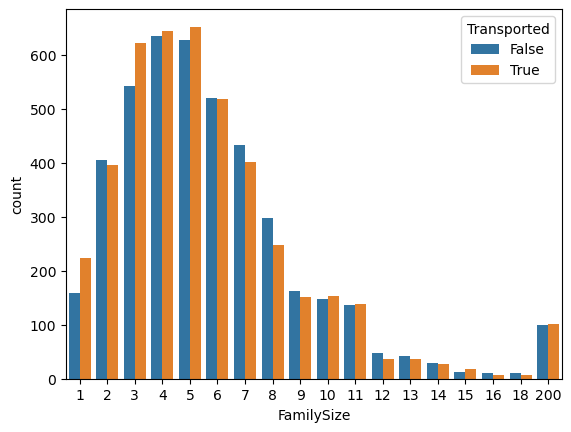

In [8]:
sns.countplot(data=train_data, x='FamilySize', hue='Transported')

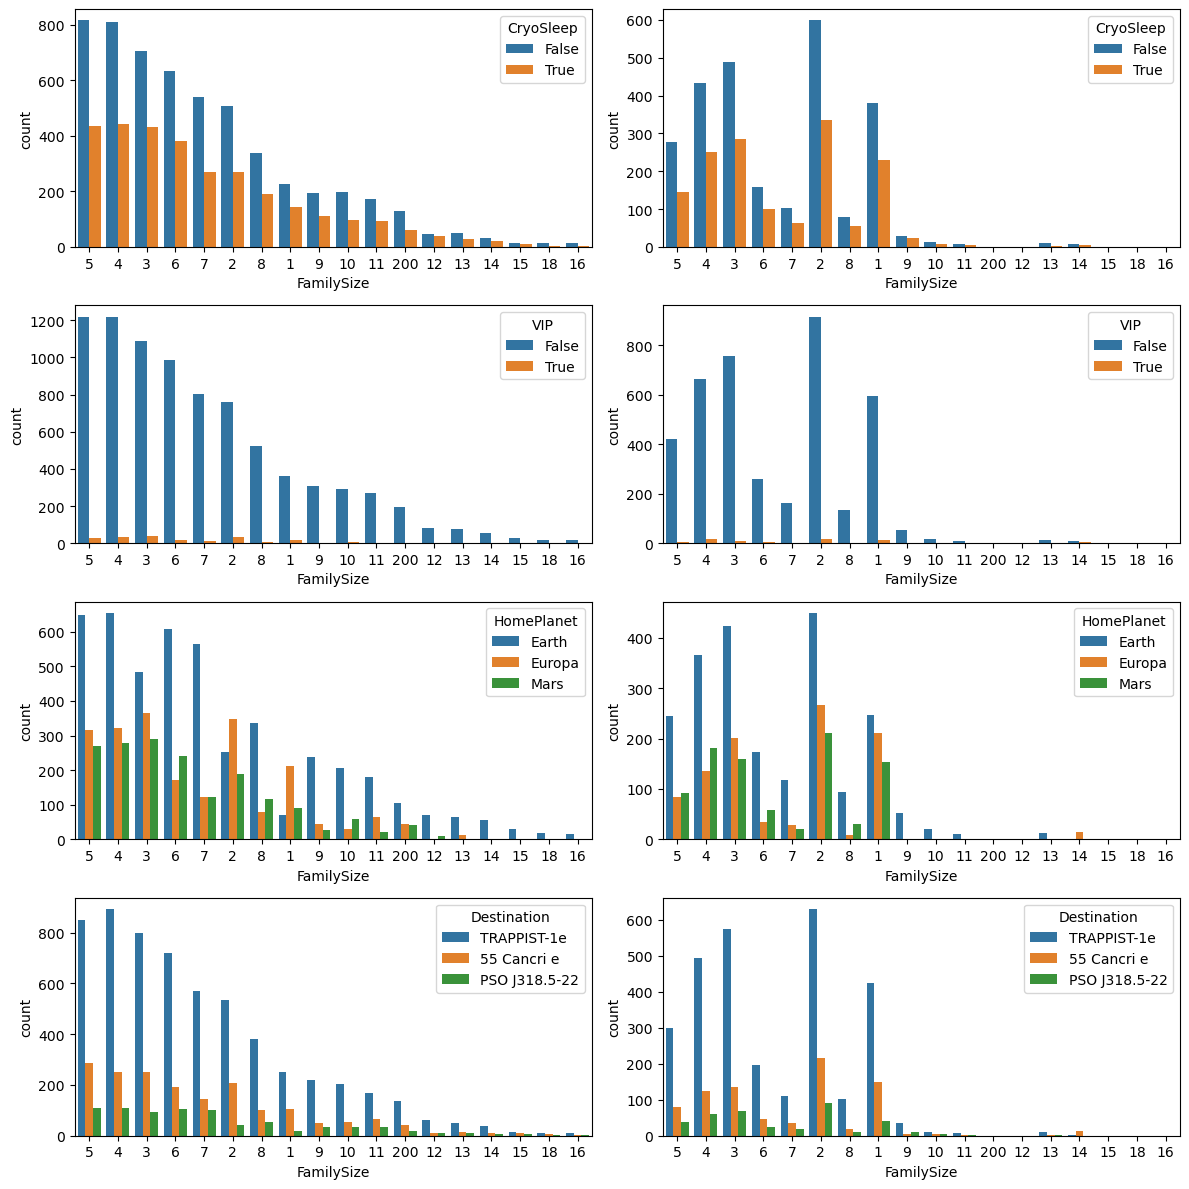

In [10]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(12, 12))

for i, f in enumerate(['CryoSleep', 'VIP', 'HomePlanet', 'Destination']):
    order = train_data['FamilySize'].value_counts().index
    hue_order = train_data[f].value_counts().index
    sns.countplot(data=train_data, x='FamilySize', hue=f, order=order, hue_order=hue_order, ax=ax[i, 0])
    sns.countplot(data=test_data, x='FamilySize', hue=f, order=order, hue_order=hue_order, ax=ax[i, 1])

fig.tight_layout()